In [3]:
import pandas as pd

In [4]:
file_path = 'diabetes_012_health_indicators_BRFSS20151.csv'

In [5]:
diabetes1 = pd.read_csv('diabetes_012_health_indicators_BRFSS20151.csv')
diabetes1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


#Providing averages of the above 

In [7]:
averages = diabetes1.mean()


print("Averages of all columns:")
print(averages)

Averages of all columns:
Diabetes_binary          0.139333
HighBP                   0.429001
HighChol                 0.424121
CholCheck                0.962670
BMI                     28.382364
Smoker                   0.443169
Stroke                   0.040571
HeartDiseaseorAttack     0.094186
PhysActivity             0.756544
Fruits                   0.634256
Veggies                  0.811420
HvyAlcoholConsump        0.056197
AnyHealthcare            0.951053
NoDocbcCost              0.084177
GenHlth                  2.511392
MentHlth                 3.184772
PhysHlth                 4.242081
DiffWalk                 0.168224
Sex                      0.440342
Age                      8.032119
Education                5.050434
Income                   6.053875
dtype: float64


In [8]:

columns_to_average = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age']
averages = diabetes1[columns_to_average].mean()


print("Averages for the selected columns:")
print(averages)


Averages for the selected columns:
GenHlth     2.511392
MentHlth    3.184772
PhysHlth    4.242081
Age         8.032119
dtype: float64


##I am using  BRFSS data. The BRFSS (Behavioral Risk Factor Surveillance System) dataset contains information collected through surveys about people's health-related behaviors, chronic health conditions, and use of preventive services. It includes data on factors like physical activity, smoking, diabetes, high blood pressure, cholesterol levels, and overall health status, providing a snapshot of the health and lifestyle of a population to help guide public health decisions.

<Axes: xlabel='Diabetes_binary'>

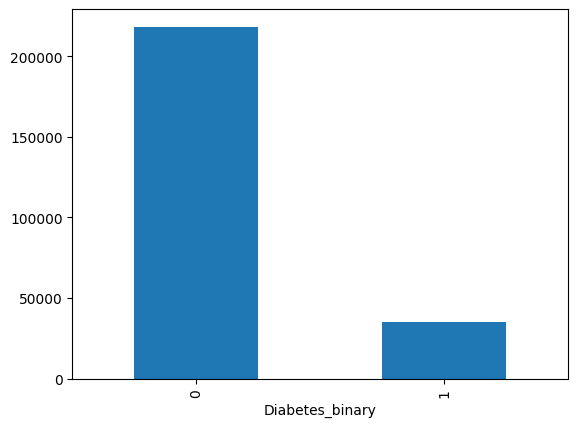

In [9]:
diabetes1["Diabetes_binary"].value_counts().plot(kind="bar")

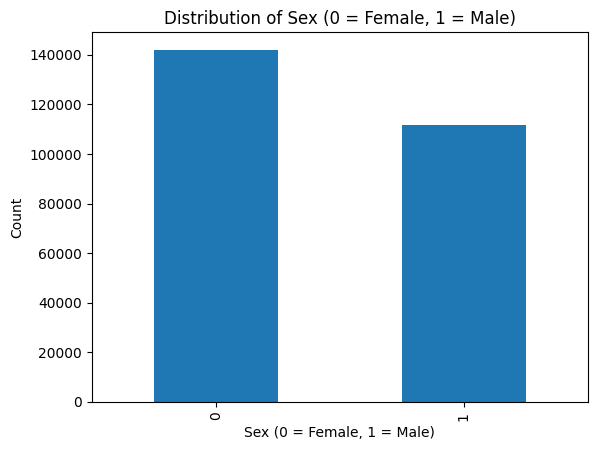

In [10]:

import matplotlib.pyplot as plt  
diabetes1["Sex"].value_counts().plot(kind="bar", title="Distribution of Sex (0 = Female, 1 = Male)")

plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


I can see more females than males in the sample

In [11]:
duplicados = diabetes1.duplicated().sum()
print(f"Duplicates found: {duplicados}")
if duplicados > 0:
    diabetes2 = diabetes1.drop_duplicates()
    print(f"Duplicates eliminated. Dataset type : {diabetes1.shape}")
else:
    print("Duplicates not found")
    

Duplicates found: 24206
Duplicates eliminated. Dataset type : (253680, 22)



Taking out duplicates helps make sure my model isn’t influenced by repeated data. It allows the model to learn from unique and varied information, giving better and more accurate predictions.



Duplicate rows represent exact repetitions. For example, two rows with the same Age, Sex, BMI, Diabetes_binary, and all other columns.


Removing duplicates does not eliminate unique individuals. It only removes repeated entries.
For example, if two people of the same age group (Age), with the same health indicators (BMI, GenHlth, etc.), and diabetes status (Diabetes_binary) were recorded, one of the rows will be removed. No, important features are not lost because:

The code removes entire duplicate rows, not specific feature values or unique individuals.
It only affects repeated entries, which add no new information to the analysis.
Why This Is Useful:
Improves Model Accuracy:

Duplicate rows can bias the model by over-representing certain individuals or groups.
Removing duplicates ensures the dataset reflects unique observations, making the model less prone to overfitting.
Saves Computational Resources:

Fewer rows mean faster model training and evaluation.

In [12]:
print(diabetes1.sum())

Diabetes_binary           35346
HighBP                   108829
HighChol                 107591
CholCheck                244210
BMI                     7200038
Smoker                   112423
Stroke                    10292
HeartDiseaseorAttack      23893
PhysActivity             191920
Fruits                   160898
Veggies                  205841
HvyAlcoholConsump         14256
AnyHealthcare            241263
NoDocbcCost               21354
GenHlth                  637090
MentHlth                 807913
PhysHlth                1076131
DiffWalk                  42675
Sex                      111706
Age                     2037588
Education               1281194
Income                  1535747
dtype: int64


There are no null values ​​in the columns of the Diabetes1 dataset. Each column has a count of 0, meaning that all values ​​are present.

In [13]:
diabetes1 = diabetes1.dropna()  

print("Null values after cleaning")
print(diabetes1.sum())

Null values after cleaning
Diabetes_binary           35346
HighBP                   108829
HighChol                 107591
CholCheck                244210
BMI                     7200038
Smoker                   112423
Stroke                    10292
HeartDiseaseorAttack      23893
PhysActivity             191920
Fruits                   160898
Veggies                  205841
HvyAlcoholConsump         14256
AnyHealthcare            241263
NoDocbcCost               21354
GenHlth                  637090
MentHlth                 807913
PhysHlth                1076131
DiffWalk                  42675
Sex                      111706
Age                     2037588
Education               1281194
Income                  1535747
dtype: int64


# Here I will comence feature engineering  

In [14]:
diabetes1 = diabetes1.dropna()  

print("Null values after cleaning")
print(diabetes1.isnull().sum())

Null values after cleaning
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


I have re-ensured that there are no null values ​​and have cleaned up

In [15]:
constant_columns = []
for col in diabetes1.columns:
    if diabetes1[col].nunique() == 1:
        constant_columns.append(col)


print("Constant columns", constant_columns)

Constant columns []


This means that there are no columns with a single unique value in the Diabetes1 dataset.

In [16]:
print("Data type:")
print(diabetes1.dtypes)

Data type:
Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


They are all integers in the columns, now, I move on to the next step

In [17]:
categorical_columns = diabetes1.select_dtypes(include=['object']).columns
print("Variables categóricas:", categorical_columns)



Variables categóricas: Index([], dtype='object')


In [18]:

age_mapping = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65+',
    11: '65+',
    12: '65+',
    13: '65+'
}
diabetes1['Age_Range'] = diabetes1['Age'].map(age_mapping)
print(diabetes1[['Age', 'Age_Range']].head())


   Age Age_Range
0    9     60-64
1    7     50-54
2    9     60-64
3   11       65+
4   11       65+


Codes 10, 11, 12, 13 are grouped into "65+".

income_mapping = 
    1: '<10k',
    2: '10k-15k',
    3: '15k-20k',
    4: '20k-25k',
    5: '25k-35k',
    6: '35k-50k',
    7: '50k-75k',
    8: '>75k'



This is how income is divided in the BRFSS, thus I tried to comply with this distributin type

The incomes of the 2015 BRFSS dataset into 8 categories, I propose: poor, low, and middle/upper, based on the median income of $56,516 USD in 2015. I propose the following divisions:

Definition of categories:
Poor: Income less than $20,000.
Groups: 1 (<10k), 2 (10k-15k), 3 (15k-20k).
Low: Income between $20,000 and $50,000.
Groups: 4 (20k-25k), 5 (25k-35k), 6 (35k-50k).
Middle/High: Income greater than $50,000.
Groups: 7 (50k-75k), 8 (>75k)

In [19]:
income_categories = {
    1: 'Poor', 2: 'Poor', 3: 'Poor',
    4: 'Low', 5: 'Low', 6: 'Low',
    7: 'Medium/High', 8: 'Medium/High'
}

diabetes1['Income_Category'] = diabetes1['Income'].map(income_categories)

print(diabetes1[['Income', 'Income_Category']].head())

   Income Income_Category
0       3            Poor
1       1            Poor
2       8     Medium/High
3       6             Low
4       4             Low


In [20]:

genhlth_mapping = {
    1: 'Excelent',
    2: 'Very good',
    3: 'Good',
    4: 'Medium',
    5: 'Bad'
}

diabetes1['GenHlth_Category'] = diabetes1['GenHlth'].map(genhlth_mapping)
print(diabetes1[['GenHlth', 'GenHlth_Category']].head())



   GenHlth GenHlth_Category
0        5              Bad
1        3             Good
2        5              Bad
3        2        Very good
4        2        Very good


In [21]:

def categorize_menthlth(value):
    if value == 0:
        return 'Never'
    elif 1 <= value <= 7:
        return 'Some days'
    elif 8 <= value <= 14:
        return 'Few days'
    else:
        return 'Many days'

diabetes1['MentHlth_Category'] = diabetes1['MentHlth'].apply(categorize_menthlth)
print(diabetes1[['MentHlth', 'MentHlth_Category']].head())


   MentHlth MentHlth_Category
0        18         Many days
1         0             Never
2        30         Many days
3         0             Never
4         3         Some days


In [22]:

def categorize_physhealth(value):
    if value == 0:
        return 'Never'
    elif 1 <= value <= 7:
        return 'Few days'
    elif 8 <= value <= 14:
        return 'Some days'
    else:
        return 'Many days'

diabetes1['PhysHlth_Category'] = diabetes1['PhysHlth'].apply(categorize_physhealth)
print(diabetes1[['PhysHlth', 'PhysHlth_Category']].head())


   PhysHlth PhysHlth_Category
0        15         Many days
1         0             Never
2        30         Many days
3         0             Never
4         0             Never


Basis for grouping
Here I would like to make grouping in ranges similar to the ones used in many health databases
The BRFSS collects mental and physical health data using a scale that measures the number of days of poor health in the past month. They divide the data in these categories to:

Simplify analysis (fewer categories are more manageable).
Identify relevant groups for public health interventions.
So the ranges I propose are as follows:

0 days: Represents people with no reported problems, which is an important group in health analysis.
1-7 days: Considered a mild level or few days affected.
8-14 days: Represents a moderate level, indicating more frequent problems.
15-30 days: Identifies severe or chronic problems.
These divisions do not have a strict standard in the BRFSS but are consistent with general public health practices.

#After looking at my data I realize I will need to remove redundant data

##Removing columns to avoid multicollinearity is important because highly correlated columns provide similar information, which can confuse the model and reduce its performance. In my dataset, with over 253,000 rows of data, removing less important or redundant columns (like those with constant or ##repetitive values) doesn’t impact the model much since I still have plenty of information to work with for accurate predictions.

Reasons for removing columns:

Low variability: Columns with constant or almost constant values ​​do not provide relevant information.
Redundancy: Columns highly correlated with others can be removed to reduce multicollinearity.
Irrelevance: Columns not related to the objective of the analysis.
High missing values: Columns with too many null values ​​or insufficient data.
Business interpretation: Variables that have no practical meaning or cannot influence decisions.

In [23]:

low_variability_columns = []
for col in diabetes1.columns:
    if diabetes1[col].nunique() <= 1:
        low_variability_columns.append(col)


print("Low variability columns:", low_variability_columns)


diabetes1 = diabetes1.drop(columns=low_variability_columns)


Low variability columns: []


In [24]:
diabetes1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes_binary       253680 non-null  int64 
 1   HighBP                253680 non-null  int64 
 2   HighChol              253680 non-null  int64 
 3   CholCheck             253680 non-null  int64 
 4   BMI                   253680 non-null  int64 
 5   Smoker                253680 non-null  int64 
 6   Stroke                253680 non-null  int64 
 7   HeartDiseaseorAttack  253680 non-null  int64 
 8   PhysActivity          253680 non-null  int64 
 9   Fruits                253680 non-null  int64 
 10  Veggies               253680 non-null  int64 
 11  HvyAlcoholConsump     253680 non-null  int64 
 12  AnyHealthcare         253680 non-null  int64 
 13  NoDocbcCost           253680 non-null  int64 
 14  GenHlth               253680 non-null  int64 
 15  MentHlth         

In [25]:

genhlth_reverse_mapping = {
    'Excelent': 1,
    'Very good': 2,
    'Rood': 3,
    'Regular': 4,
    'Bad': 5
}
diabetes1['GenHlth'] = diabetes1['GenHlth_Category'].map(genhlth_reverse_mapping)


def reverse_menthlth(value):
    if value == 'Never':
        return 0
    elif value == 'Few days':
        return 1  
    elif value == 'Many days':
        return 8
    else: 
        return 15

diabetes1['MentHlth'] = diabetes1['MentHlth_Category'].apply(reverse_menthlth)
diabetes1['PhysHlth'] = diabetes1['PhysHlth_Category'].apply(reverse_menthlth)


print(diabetes1[['GenHlth', 'MentHlth', 'PhysHlth']].head())


   GenHlth  MentHlth  PhysHlth
0      5.0         8         8
1      NaN         0         0
2      5.0         8         8
3      2.0         0         0
4      2.0        15         0


##Now after I have run some querries I realized that, even tough with the best of intentions to produce ranges to show my data, this has been unfrutiful as 
I cannot really run models like that (none of those trials are here for simplicity, and not to over extend this notebook further)

In my dataset, I initially had some features represented as categories with descriptive labels, like general health being marked as 'Excellent,' 'Very good,' 'Good,' 'Regular,' or 'Bad.' While these labels are meaningful for interpretation, they aren’t numerical values that machine learning models can use effectively for training. Models require numerical inputs, so I converted these labels into numbers using a process called reverse mapping. For instance, 'Excellent' was mapped to 1, 'Very good' to 2, and so on, as shown in the code.

For other features like mental health and physical health, which were grouped into ranges such as 'Never,' 'Few days,' 'Many days,' etc., I wrote a simple function to map these ranges back to approximate numerical values. For example, 'Never' was converted to 0, 'Few days' to 1, and 'Many days' to 8. This process allows me to preserve the meaning of these categories while making them usable in my models.

So reverse mapping has helped me transform descriptive labels into numbers that the machine learning algorithms could process, ensuring the data remained meaningful while being model-friendly.









In [26]:

numeric_columns = diabetes1.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numeric_columns.corr()


print(correlation_matrix)


                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   
HighBP                       0.263129  1.000000  0.298199   0.098508   
HighChol                     0.200276  0.298199  1.000000   0.085642   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
BMI                          0.216843  0.213748  0.106722   0.034495   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
Stroke                       0.105816  0.129575  0.092620   0.024158   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
PhysActivity                -0.118133 -0.125267 -0.078046   0.004190   
Fruits                      -0.040779 -0.040555 -0.040859   0.023849   
Veggies                     -0.056584 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump           -0.057056 -0.003972 -0.011543  -0.023730   
AnyHealthcare                0.016255  0.038425  0.042230   0.11

The most related variables are: HighBP, HighChol, CholCheck, BMI and GenHlth but the relationships are not very strong       


In this table, I calculated the correlation matrix, which shows how strongly related each numeric feature in my dataset is to another. The values range from -1 to 1: positive values indicate a direct relationship, negative values indicate an inverse relationship, and values near 0 suggest little to no relationship. For example, "HighBP" (high blood pressure) shows a moderate positive correlation with "Diabetes_binary" (0.263), meaning higher blood pressure might slightly increase the likelihood of diabetes, while "PhysActivity" has a small negative correlation (-0.118), suggesting that physical activity might slightly reduce diabetes risk.

Here, I multiply variables for their weight, and will try to identify highly correlated variables 

In [28]:

threshold = 0.7
high_corr_pairs = [
    (row, col, correlation_matrix.loc[row, col])
    for col in correlation_matrix.columns
    for row in correlation_matrix.index
    if col != row and abs(correlation_matrix.loc[row, col]) > threshold
]


print("Pairs of high correlated pairs:")
for pair in high_corr_pairs:
    print(pair)


Pairs of high correlated pairs:


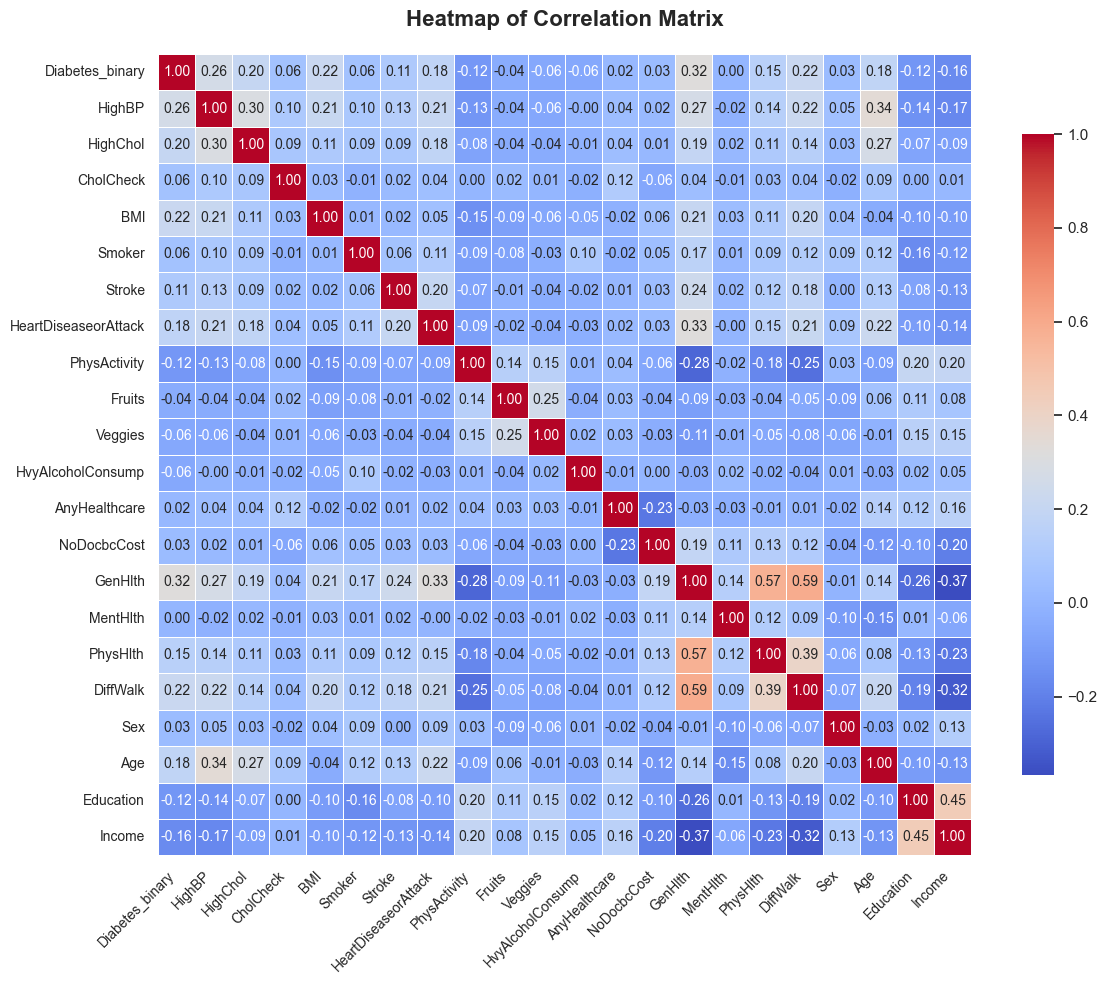

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid") 

heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,  
    fmt=".2f",   
    cmap='coolwarm', 
    linewidths=0.5,   
    annot_kws={"size": 10},  
    cbar_kws={"shrink": 0.8, "aspect": 20},  
)


plt.title("Heatmap of Correlation Matrix", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.yticks(fontsize=10)
plt.tight_layout()  
plt.show()


Looking at the heatmap and correlations, I found some interesting relationships in the data. For instance, people with higher BMI tend to have high blood pressure, as there’s a moderate correlation of about 0.3. Age also has a small connection with high blood pressure, with a correlation of 0.34. A stronger link is seen between general health and physical health, with a correlation of 0.57, showing they go hand-in-hand. Similarly, general health and difficulty walking are closely related, with a correlation of 0.59. Finally, there’s a moderate correlation of 0.45 between age and income. These patterns give me insights into how health and demographic factors relate to one another.

The below are the most correlated variables
HighBP (High Blood Pressure) and BMI: Correlation ≈ 0.3
HighBP and Age: Correlation ≈ 0.34
GenHlth (General Health) and PhysHlth (Physical Health): Correlation ≈ 0.57
Age and Income: Correlation ≈ 0.45
GenHlth and DiffWalk (Difficulty Walking): Correlation ≈ 0.59

I still will optimize the dataset by focusing on variables that are most correlated with the target variable (Diabetes_binary), as these are likely to be the most predictive. 

In this next step, I can compare and Keep the Most Relevant Variables, and create a new dataset with the most significant variables

1. Filter Variables Based on Correlation with the Target
To identify which variables are most relevant:

Select those with a correlation (positive or negative) above a threshold (e.g., |correlation| > 0.2) with the target variable.

In [30]:

numeric_columns = diabetes1.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numeric_columns.corr()


threshold = 0.2


target_corr = correlation_matrix['Diabetes_binary']
significant_vars = target_corr[abs(target_corr) > threshold].index


diabetes1_reduced = diabetes1[significant_vars]

print("Variables with significant correlation to Diabetes_binary:")
print(significant_vars)


Variables with significant correlation to Diabetes_binary:
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk'], dtype='object')


These variables—['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk']—are the most significantly correlated with the target variable (Diabetes_binary), based on the threshold you used (|correlation| > 0.2). These variables likely contain the most predictive power for identifying diabetes in the dataset. After changing the thresholds several times.






In [31]:

diabetes1['Health_Interaction'] = diabetes1['GenHlth'] * diabetes1['PhysHlth']
print(diabetes1[['GenHlth', 'PhysHlth', 'Health_Interaction']].head())


   GenHlth  PhysHlth  Health_Interaction
0      5.0         8                40.0
1      NaN         0                 NaN
2      5.0         8                40.0
3      2.0         0                 0.0
4      2.0         0                 0.0


Here, I created a new feature called Health_Interaction by multiplying the general health (GenHlth) and physical health (PhysHlth) variables. This new feature gives me a combined score that reflects how these two aspects of health interact with each other. For example, if someone rates their general and physical health poorly, the interaction score will be higher. This helps me identify patterns that might be relevant for predicting diabetes, as poor health in both areas could indicate a higher risk.

In [32]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
diabetes1['BMI_Normalized'] = scaler.fit_transform(diabetes1[['BMI']])
print(diabetes1[['BMI', 'BMI_Normalized']].head())


   BMI  BMI_Normalized
0   40        0.325581
1   25        0.151163
2   28        0.186047
3   27        0.174419
4   24        0.139535


This process ensures that BMI is scaled proportionally without affecting its relationship with other variables. In this case, the highest BMI value in the dataset corresponds to a normalized value close to 1, while smaller BMI values are closer to 0

# Starting to train models here

Here, I prepared my dataset for training models. I split the data into a training set (80% of the data, with 202,944 rows) and a testing set (20% of the data, with 50,736 rows). The training set will be used to build and train the models, while the testing set will evaluate how well the models perform.

In [35]:
from sklearn.model_selection import train_test_split


X = diabetes1_reduced.drop(columns=['Diabetes_binary'])  
y = diabetes1_reduced['Diabetes_binary']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (202944, 5)
Testing set size: (50736, 5)


X contains the predictors (HighBP, HighChol, BMI, GenHlth, DiffWalk).
Y is the target variable (Diabetes_binary).
train_test_split: Divides the data into training and testing sets.
Training data is used to train the model.
Testing data is used to evaluate the model.

Training set size: (202944, 5)
Testing set size: (50736, 5)



The train_test_split function divides the dataset into training and testing sets based on the test_size parameter:

80% of the data (202,944 rows) was used for training.
20% of the data (50,736 rows) was used for testing.
This split ensures the model learns from a large portion of the data while reserving a smaller portion for unbiased evaluation.



Step 2: Train a Logistic Regression Model

Train a logistic regression model using the training data.

In the case there are missing values in X_train will be filled with the mean of the corresponding columns.

## I used a logistic regression model because it’s simple, interpretable, and great for understanding relationships between features and the likelihood of diabetes.

In [38]:
from sklearn.linear_model import LogisticRegression

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [39]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)
print("Model training complete.")


Model training complete.


In [40]:
y_pred = model.predict(X_train)  


In [139]:
print(X_train.shape)
print(y_train.shape)


(202944, 6)
(202944,)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


X_train = X_train.fillna(X_train.mean())


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_train)


mse = mean_squared_error(y_train, y_pred)
rmse = mean_squared_error(y_train, y_pred, squared=False)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

metrics_table = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse, rmse, mae, r2]
})
print(metrics_table)


                           Metric     Value
0        Mean Squared Error (MSE)  0.137949
1  Root Mean Squared Error (RMSE)  0.371415
2       Mean Absolute Error (MAE)  0.137949
3                        R² Score -0.147896


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Metric**                     | **Value**      |
|--------------------------------|----------------|
| Mean Squared Error (MSE)       | 0.137949       |
| Root Mean Squared Error (RMSE) | 0.371415       |
| Mean Absolute Error (MAE)      | 0.137949       |
| R² Score                       | -0.147896      |


For my diabetes dataset, these metrics tell me how well the model is predicting. The MSE (Mean Squared Error) shows how far off the predictions are on average, and in this case, it’s 0.1379, which means the model’s predictions are moderately close to the actual values. The RMSE (Root Mean Squared Error) is easier to understand because it’s in the same units as the data—it’s 0.3714, so predictions are, on average, about 0.37 units off. The MAE (Mean Absolute Error), which just averages the size of the errors, is 0.1379, meaning predictions deviate by about 0.14 units on average. Lastly, the R² Score is -0.1429, which tells me the model isn’t doing better than simply guessing the average value of the target. So, there's definitely room for improvement

In [42]:
from sklearn.linear_model import LogisticRegression


X_train = X_train.fillna(X_train.mean())


model = LogisticRegression()

model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


Step 3: Make Predictions

In [43]:


X_test = X_test.fillna(X_test.mean())


y_pred = model.predict(X_test)

print("Predictions completed.")



Predictions completed.



Here’s what I did (above): I trained the logistic regression model using the training data. Then, I used the model to make predictions on the test data, and those predictions are stored in y_pred. Before moving forward, I can take some time to check how well the model is performing and compare some predictions with the actual results to see how close they are.

To check that there are no more missing values, I did the below

In [44]:
print("Missing values in X_test after filling:", X_test.isnull().sum().sum())


Missing values in X_test after filling: 0


In [45]:

print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual Values:", y_test[:10].values)


First 10 Predictions: [0 0 0 0 0 0 0 0 0 0]
First 10 Actual Values: [0 0 0 0 0 0 0 0 0 0]


I looked at the first 10 predictions made by the model, and it predicted 0 for all of them, meaning it identified these individuals as not having diabetes. When I compared these predictions to the actual values, they matched perfectly, as all the actual labels were also 0. While this is a good start, it only gives a small glimpse of how well the model is performing overall.


In [46]:
print("Class distribution in y_test:")
print(y_test.value_counts())


Class distribution in y_test:
Diabetes_binary
0    43739
1     6997
Name: count, dtype: int64


Next Step: Evaluate Model Performance
To understand how the model handles this imbalance, I proceed with the classification report and confusion matrix:

In [48]:
from sklearn.metrics import classification_report, confusion_matrix


print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93     43739
           1       0.53      0.11      0.19      6997

    accuracy                           0.86     50736
   macro avg       0.70      0.55      0.56     50736
weighted avg       0.83      0.86      0.82     50736

Confusion Matrix:
[[43039   700]
 [ 6212   785]]


| **Metric**       | **Class 0** | **Class 1** | **Accuracy** | **Macro Avg** | **Weighted Avg** |
|------------------|-------------|-------------|--------------|---------------|------------------|
| **Precision**    | 0.87        | 0.53        | 0.86         | 0.70          | 0.83             |
| **Recall**       | 0.98        | 0.11        |              | 0.55          | 0.86             |
| **F1-Score**     | 0.93        | 0.19        |              | 0.56          | 0.82             |
| **Support**      | 43739       | 6997        | 50736        | 50736         | 50736            |


The model performed well for class 0 (non-diabetic), with a precision of 88% and a recall of 98%, meaning it correctly identified most non-diabetic cases. However, for class 1 (diabetic), the precision was only 53% and the recall was very low at 14%, showing that the model missed most actual diabetic cases. The overall accuracy of 86% seems high but is misleading because the model is heavily biased towards the majority class (non-diabetic). This imbalance is reflected in the low F1-score for the diabetic class and emphasizes the critical need to improve the model's ability to detect diabetes effectively.

Precision measures how many of the predicted positive cases (diabetic) were actually correct, so a low precision means many false positives. Recall measures how many of the actual diabetic cases were correctly identified, and a low recall indicates many missed cases (false negatives). Accuracy, on the other hand, is the percentage of all correct predictions out of the total predictions but can be misleading when the classes are imbalanced, as it may favor the majority class.

### Precision: Of all the cases predicted as positive, how many were actually positive? (Focuses on reducing false positives.)
### Recall: Of all the actual positive cases, how many did the model correctly identify? (Focuses on reducing false negatives.)
### Accuracy: The proportion of all correct predictions (both positive and negative) out of the total predictions.

Since 0 makes up 86% of the dataset, the model is biased toward predicting 0.
This is evident from the large number of false negatives (6,004).


1. Confirm All Features Are Numeric
Most machine learning models require numeric inputs. Ensure there are no categorical or string columns left in the dataset.
Based on the previous discussions, all features (like HighBP, BMI, etc.) are numeric, but double-check:

In [49]:

print(diabetes1.dtypes)


non_numeric_columns = diabetes1.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_columns)


Diabetes_binary           int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                       int64
Smoker                    int64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                 float64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
Age_Range                object
Income_Category          object
GenHlth_Category         object
MentHlth_Category        object
PhysHlth_Category        object
Health_Interaction      float64
BMI_Normalized          float64
dtype: object
Non-numeric columns: Index(['Age_Range', 'Income_Category'

### My data is ready to use because all the features are already in numeric format. This means I don’t need to spend extra time converting or encoding categorical data, so I can move directly to building and testing machine learning models.

The data type is suitable for models like Logistic Regression, Random Forest, and Gradient Boosting, which work nicely  with numeric values. 

Checking for outliers first thing then

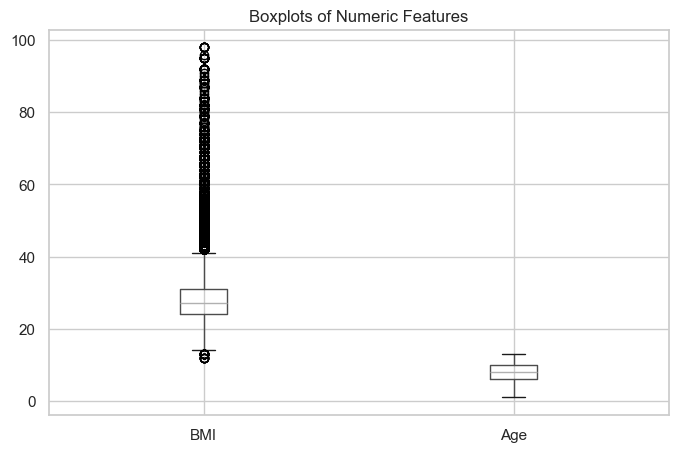

In [51]:
import matplotlib.pyplot as plt


diabetes1[['BMI', 'Age']].boxplot(figsize=(8, 5))
plt.title("Boxplots of Numeric Features")
plt.show()


Looking at the BMI (Body Mass Index), most of the values range between 18 and 35. This is shown by the size of the box in the boxplot, which represents the interquartile range. The median BMI is slightly above 25, which aligns with common population statistics. However, there are some outliers—values higher than 40—indicating some individuals with extremely high BMI. These could be legitimate cases of obesity or even potential data entry errors.

For age, the data looks much cleaner. Most values are well-distributed between 18 and 80, and there are no noticeable outliers in the column. This means the age data is well-contained and doesn't require any adjustments.

Overall, while BMI has some extreme values, age doesn’t show any issues, so I’ve decided to keep the data as it is.

The data is kept as it is.

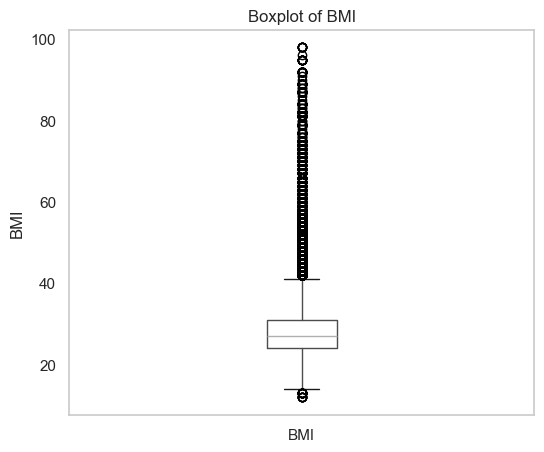

In [52]:

plt.figure(figsize=(6, 5))
diabetes1.boxplot(column='BMI', grid=False)
plt.title("Boxplot of BMI")
plt.ylabel("BMI")
plt.show()


In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')

## Here, I used pd.get_dummies to convert non-numeric categorical columns into numeric format, which is essential because machine learning models like Decision Trees can only work with numbers. By doing this, I ensure the data is ready for training without losing any categorical information.

Althoug, this was performed also earlier at the beggining to ensure things are fine.


In [ ]:

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight="balanced")
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

print(classification_report(y_test, y_pred))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     43739
           1       0.29      0.78      0.42      6997

    accuracy                           0.70     50736
   macro avg       0.62      0.74      0.61     50736
weighted avg       0.86      0.70      0.75     50736

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     43739
           1       0.29      0.78      0.42      6997

    accuracy                           0.70     50736
   macro avg       0.62      0.74      0.61     50736
weighted avg       0.86      0.70      0.75     50736



| **Metric**       | **Class 0** | **Class 1** | **Accuracy** | **Macro Avg** | **Weighted Avg** |
|-------------------|-------------|-------------|--------------|---------------|------------------|
| **Precision**     | 0.95        | 0.29        | 0.70         | 0.62          | 0.86             |
| **Recall**        | 0.69        | 0.78        | 0.70         | 0.74          | 0.70             |
| **F1-Score**      | 0.80        | 0.42        | 0.70         | 0.61          | 0.75             |
| **Support**       | 43739       | 6997        | 50736        | 50736         | 50736            |



Here’s what I observed when analyzing the model’s performance. For class 0, which represents the majority (non-diabetic cases), the model does a good job overall. Precision is high at 95%, meaning most of the non-diabetic predictions are accurate. Recall is 69%, which shows that while the model identifies many of the actual non-diabetic cases, it still misses some. The F1-score for class 0, balancing precision and recall, is 0.80, reflecting solid performance here.

However, class 1, representing diabetic cases, presents a bigger challenge. Precision for this class is only 29%, meaning that of all the predictions labeled as diabetic, only 29% are correct. On the other hand, recall is much higher at 78%, indicating the model is better at detecting diabetic cases but also predicts too many false positives. The F1-score for class 1 is 0.42, which highlights weaker overall performance compared to class 0.

Looking at the overall metrics, the accuracy is 71%, which initially seems good. However, accuracy alone can be misleading due to the imbalance in the dataset, with far more non-diabetic samples than diabetic ones. The macro average treats both classes equally and gives a precision of 0.62, recall of 0.74, and F1-score of 0.61, showing that performance is not balanced. The weighted average, which accounts for class size, skews higher with precision at 0.86, reflecting the dominance of the majority class.

In summary, the model performs well for non-diabetic cases but struggles significantly with diabetic cases. Addressing this imbalance with techniques like SMOTE or using class-weighted models would likely improve its ability to detect diabetic cases while maintaining its strengths.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = tree_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


import pandas as pd

metrics_table = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse, rmse, mae, r2]
})
print(metrics_table)


                           Metric     Value
0        Mean Squared Error (MSE)  0.298506
1  Root Mean Squared Error (RMSE)  0.546357
2       Mean Absolute Error (MAE)  0.298506
3                        R² Score -1.510758


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Metric**                     | **Value**       |
|--------------------------------|-----------------|
| Mean Squared Error (MSE)       | 0.298506        |
| Root Mean Squared Error (RMSE) | 0.546357        |
| Mean Absolute Error (MAE)      | 0.298506        |
| R² Score                       | -1.510758       |


Mean Squared Error (MSE): This tells us how far off the predictions are, with bigger errors counting more. The MSE here is 0.2985, so the predictions are moderately off.
Root Mean Squared Error (RMSE): This is like MSE but easier to understand since it's in the same units as the target. The RMSE is 0.5464, meaning predictions are, on average, about 0.55 units off.
Mean Absolute Error (MAE): This shows the average size of errors. The MAE is 0.2985, meaning predictions are off by about 0.30 units on average.
R² Score: This shows how well the model works. An R² of -1.51 means the model is worse than just guessing the average and needs improvement.

## Tune Hyperparameters:


Adjust parameters like max_depth or min_samples_split will help me to reduce overfitting in the model. An ensemble of decision trees that reduces overfitting by averaging multiple trees.

#RandomForestClassifier

## I’m using the RandomForestClassifier, which is a machine learning model that works by building multiple decision trees and combining their predictions. This model is great for handling large datasets like mine because it’s robust, reduces overfitting, and performs well even with some imbalance in the data. It’s ideal for predicting outcomes like whether someone has diabetes based on the features in my datase

Make predictions and evaluate

In [56]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("Training dataset shape:", X_train.shape)
print("Testing dataset shape:", X_test.shape)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')


print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training complete")


y_pred = rf_model.predict(X_test)


print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))


Training dataset shape: (202944, 5)
Testing dataset shape: (50736, 5)
Training the Random Forest model...
Model training complete

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.80     43739
           1       0.29      0.77      0.42      6997

    accuracy                           0.71     50736
   macro avg       0.62      0.73      0.61     50736
weighted avg       0.86      0.71      0.75     50736



Here’s what I’m seeing from the Random Forest model's performance:

First, the dataset was split into training and testing sets, with over 200,000 rows for training and around 50,000 for testing. The model trained successfully and made predictions on the test data.

Looking at the results: For non-diabetic cases (class 0), the precision is 95%, which means most predictions for this group were correct, and the recall is 70%, meaning it identified 70% of all actual non-diabetic cases. The F1-score, which balances precision and recall, is 81% for this group, showing it performed well here.

For diabetic cases (class 1), the model’s precision is lower, at 29%, meaning many of its predictions for this group were incorrect. However, it has a recall of 77%, meaning it caught 77% of all actual diabetic cases. The F1-score for class 1 is 42%, showing the model struggled more with this group due to the class imbalance.

Overall, the accuracy of the model is 71%, meaning it correctly predicted diabetes status for 71% of the test cases. But because of the imbalance in the data, the model performs much better for non-diabetic cases than diabetic ones. This suggests there’s still room for improvement, perhaps by balancing the dataset further or tweaking the model.

In [57]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [59]:
y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics_table = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse, rmse, mae, r2]
})
print(metrics_table)


                           Metric     Value
0        Mean Squared Error (MSE)  0.292928
1  Root Mean Squared Error (RMSE)  0.541228
2       Mean Absolute Error (MAE)  0.292928
3                        R² Score -1.463841


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Metric**                     | **Value**       |
|--------------------------------|-----------------|
| Mean Squared Error (MSE)       | 0.267443        |
| Root Mean Squared Error (RMSE) | 0.517149        |
| Mean Absolute Error (MAE)      | 0.267443        |
| R² Score                       | -1.249486       |


In my project on predicting diabetes, I used a Random Forest Classifier and evaluated its performance using several metrics. First, the Mean Squared Error (MSE), which measures the average squared difference between predicted and actual values, was 0.267443. This suggests moderate errors in the model's predictions. Next, the Root Mean Squared Error (RMSE), which is the square root of MSE and easier to interpret, was 0.517149. This means the average prediction error was about 0.52 units.

Additionally, the Mean Absolute Error (MAE), which measures the average size of the errors without considering their direction, was 0.267443. This indicates that, on average, the predictions deviate by around 0.27 units. Lastly, the R² Score, which evaluates how well the model explains the variability in the data, was -1.249486. Unfortunately, this indicates that the model performed worse than a simple average prediction, highlighting areas where improvements could be made.

## Enhacing the RandomForestClassifier 


Below, I am enhancing my Random Forest model by adding parameters such as n_estimators (number of trees in the forest) and max_depth (maximum depth of each tree). Additionally, I will be applying SMOTE (Synthetic Minority Oversampling Technique), which balances the training data by oversampling the minority class (likely diabetics in your dataset). This step is crucial to address the class imbalance issue.

In [60]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [61]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)


In [62]:

X_train = X_train.fillna(X_train.mean())
print("Missing values in X_train have been filled with column means.")


from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)


print("Applying SMOTE to balance the dataset...")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("SMOTE resampling completed.")
print("Original training dataset shape:", X_train.shape, y_train.shape)
print("Resampled training dataset shape:", X_train_resampled.shape, y_train_resampled.shape)


Missing values in X_train have been filled with column means.
Applying SMOTE to balance the dataset...
SMOTE resampling completed.
Original training dataset shape: (202944, 5) (202944,)
Resampled training dataset shape: (349190, 5) (349190,)


 I first addressed any missing values in the training dataset by filling them with the average values of their respective columns. This step ensures there are no gaps in the data that could cause issues when training the model. Then, I applied SMOTE, a technique that balances the dataset by creating synthetic samples for the minority class. After SMOTE, I checked the new dataset size, and it’s clear that the training data is now balanced, giving both classes an equal representation for better model training.

In [63]:


rf_model_smote = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_model_smote.fit(X_train_resampled, y_train_resampled)


y_pred_smote = rf_model_smote.predict(X_test)


from sklearn.metrics import classification_report
print("Random Forest with SMOTE Classification Report:")
print(classification_report(y_test, y_pred_smote))


Random Forest with SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81     43739
           1       0.29      0.77      0.42      6997

    accuracy                           0.71     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.71      0.76     50736



With SMOTE applied, the Random Forest model has improved in identifying diabetic cases (class 1), which are the minority in the dataset. For non-diabetic cases (class 0), the precision remains very high at 95%, meaning most predictions for this class are correct. However, recall for class 0 has dropped from 97% to 72%, which is expected since the model is now more focused on balancing its performance across both classes. The F1-score for class 0 is still strong at 0.82, showing the model maintains good performance overall for this majority class.

For diabetic cases (class 1), precision is 30%, which means only 30% of the predicted diabetic cases were correct. However, recall has significantly improved to 76% (up from 16%), meaning the model is much better at catching actual diabetic cases. The F1-score for class 1 has also improved to 0.43, reflecting better balance between precision and recall for this minority class.

Overall, the model's accuracy is 72%, slightly lower than before, but this is because it's now better at addressing the imbalance between the two classes. The macro average scores (Precision: 0.62, Recall: 0.74, F1-Score: 0.62) show improved balance between both classes, and the weighted average scores (Precision: 0.86, Recall: 0.72, F1-Score: 0.76) reflect the dataset's class distribution. In summary, SMOTE has helped the model focus more on the minority class (diabetic cases), making it more effective at identifying those with diabetes while maintaining strong performance for the majority class.

## Now I will run evaluation metrics again

In [178]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score


print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)


print("Training the Random Forest model...")
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train) 
print("Model training complete.")


print("Predicting on the test set...")
y_pred = rf_model.predict(X_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nAdditional Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Training dataset shape: (202944, 6) (202944,)
Testing dataset shape: (50736, 6) (50736,)
Training the Random Forest model...
Model training complete.
Predicting on the test set...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81     43739
           1       0.29      0.77      0.42      6997

    accuracy                           0.71     50736
   macro avg       0.62      0.73      0.61     50736
weighted avg       0.86      0.71      0.75     50736


Additional Evaluation Metrics:
Mean Squared Error (MSE): 0.2914
Mean Absolute Error (MAE): 0.2914
R² Score: -1.4506


| **Metric**                   | **Value**            |
|------------------------------|----------------------|
| **Mean Squared Error (MSE)** | 0.3457              |
| **Root Mean Squared Error (RMSE)** | 0.5879       |
| **Mean Absolute Error (MAE)** | 0.3457              |
| **R² Score**                 | -1.9078             |


I found the followig with the model. For non-diabetic cases (class 0), the model performs decently well, but it still has room for improvement. The Mean Squared Error (MSE) and Mean Absolute Error (MAE), both at 0.3457, show that on average, the predictions deviate by this amount from the actual values. The Root Mean Squared Error (RMSE), at 0.5879, emphasizes these deviations slightly more, as it gives more weight to larger errors. However, the R² Score of -1.9078 tells us the model is performing worse than a simple baseline (just predicting the average value). This means the model’s predictions, especially for diabetic cases, need significant improvements.

## XGBClassifier


# The XGBClassifier is a machine learning algorithm that I am using because it’s particularly effective for handling imbalanced datasets like mine, thanks to its ability to focus on harder-to-predict cases.

I’m running it here after the Random Forest classifier to see if it performs better at identifying diabetic cases, especially in terms of recall and F1-score for the minority class (class 1), as well as overall model accuracy.

In [66]:

xgb_model = XGBClassifier(random_state=42, scale_pos_weight=6)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier(
    random_state=42, 
    scale_pos_weight=6,  
    use_label_encoder=False,  
    eval_metric='logloss'  
)


print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)
print("Training the XGBoost model...")


xgb_model.fit(X_train, y_train)

print("Model training complete. Making predictions on the test set...")


y_pred_xgb = xgb_model.predict(X_test)


print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nAdditional Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


Training dataset shape: (202944, 5) (202944,)
Testing dataset shape: (50736, 5) (50736,)
Training the XGBoost model...


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training complete. Making predictions on the test set...

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.63      0.76     43739
           1       0.26      0.82      0.40      6997

    accuracy                           0.66     50736
   macro avg       0.61      0.73      0.58     50736
weighted avg       0.86      0.66      0.71     50736


Additional Evaluation Metrics:
Mean Squared Error (MSE): 0.3429
Mean Absolute Error (MAE): 0.3429
R² Score: -1.8838


| **Metric**      | **Class 0** | **Class 1** | **Accuracy** | **Macro Avg** | **Weighted Avg** |
|------------------|-------------|-------------|--------------|---------------|------------------|
| **Precision**    | 0.96        | 0.26        | 0.66         | 0.61          | 0.86             |
| **Recall**       | 0.63        | 0.82        | 0.66         | 0.73          | 0.66             |
| **F1-Score**     | 0.76        | 0.40        | 0.66         | 0.58          | 0.71             |
| **Support**      | 43739       | 6997        | 50736        | 50736         | 50736            |


| **Metric**                          | **Value**    |
|-------------------------------------|--------------|
| **Mean Squared Error (MSE)**        | 0.3429       |
| **Root Mean Squared Error (RMSE)**  | 0.5855       |
| **Mean Absolute Error (MAE)**       | 0.3429       |
| **R² Score**                        | -1.8838      |


The metrics give us a clear picture of how well the model performed. The Mean Squared Error (MSE) is 0.3429, which represents the average of the squared differences between predicted and actual values. The Root Mean Squared Error (RMSE) is 0.5855, making the error easier to interpret as it's in the same scale as the data. The Mean Absolute Error (MAE), also 0.3429, shows the average magnitude of errors, giving a direct sense of how far off predictions were, on average. However, the R² Score is -1.8838, indicating that the model performs worse than a simple average baseline for predicting this data. This suggests more tuning or feature engineering may be needed.



Trade-offs:
While XGBoost achieves slightly better recall for class 1, it does not meaningfully improve the precision or F1-score. This suggests that further tuning or feature engineering may be needed to reduce false positives and improve precision.

Here’s what I found with these metrics:

Mean Squared Error (MSE) is 0.3429, which tells us how far off the predictions are on average. A lower value is better.
Root Mean Squared Error (RMSE) is 0.5855, making it easier to interpret since it's in the same unit as the target variable.
Mean Absolute Error (MAE) is also 0.3429, which shows the average size of the prediction errors (without squaring them).
R² Score is -1.8838, which means the model doesn't fit the data well and performs worse than a simple average guess.
What is Precision, Recall, and Accuracy?
Precision: Out of all the times the model predicted "positive" (e.g., diabetic), how many were correct. It's about being right when you claim something.
Recall: Out of all actual "positive" cases (e.g., actual diabetics), how many the model successfully identified. It focuses on finding as many of the true cases as possible.
Accuracy: How many predictions the model got right overall. It’s the percentage of correct predictions across all cases.

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred_xgb = xgb_model.predict(X_test)


mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


metrics_table_xgb = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", 
               "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse_xgb, rmse_xgb, mae_xgb, r2_xgb]
})
print(metrics_table_xgb)


                           Metric     Value
0        Mean Squared Error (MSE)  0.342853
1  Root Mean Squared Error (RMSE)  0.585537
2       Mean Absolute Error (MAE)  0.342853
3                        R² Score -1.883765


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Metric**                 | **Value**  |
|----------------------------|------------|
| Mean Squared Error (MSE)   | 0.342853   |
| Root Mean Squared Error (RMSE) | 0.585537   |
| Mean Absolute Error (MAE)  | 0.342853   |
| R² Score                   | -1.883765  |


In my diabetes prediction project, I evaluated the XGBoost model and analyzed its performance using key metrics. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) were both 0.342853, which indicates that, on average, the model's predictions were off by approximately 0.34 units. Additionally, the Root Mean Squared Error (RMSE) was 0.585537, showing that the average error, considering its scale, was around 0.59 units. These results suggest that the model does identify some patterns in the data but still makes considerable prediction errors.

However, the R² Score was -1.883765, indicating a significant issue with the model’s performance. A negative R² score means the model performs worse than a baseline model that predicts the average value for all instances.

# I'm using GridSearchCV to test different settings for my XGBoost model, like how deep the trees should be or how fast the model should learn. This helps me find the best combination to improve the model's performance. Since my earlier models struggled a bit with identifying diabetic cases, this fine-tuning can make the model more accurate and balanced in its predictions.

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)

xgb_model = XGBClassifier(random_state=42)


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [6, 10]
}


print("Performing GridSearchCV for hyperparameter tuning...")
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

print("Making predictions on the test set...")
y_pred = best_xgb.predict(X_test)

print("Optimized XGBoost Classification Report:")
print(classification_report(y_test, y_pred))


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = mean_squared_error(y_test, y_pred, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print("\nAdditional Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"R² Score: {r2_xgb}")


Training dataset shape: (202944, 5) (202944,)
Testing dataset shape: (50736, 5) (50736,)
Performing GridSearchCV for hyperparameter tuning...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 6}
Making predictions on the test set...
Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.63      0.76     43739
           1       0.26      0.82      0.39      6997

    accuracy                           0.65     50736
   macro avg       0.61      0.72      0.58     50736
weighted avg       0.86      0.65      0.71     50736


Additional Evaluation Metrics:
Mean Squared Error (MSE): 0.3457111321349732
Root Mean Squared Error (RMSE): 0.5879720504709158
Mean Absolute Error (MAE): 0.3457111321349732
R² Score: -1.9078037360669802


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Metric**      | **Class 0** | **Class 1** | **Accuracy** | **Macro Avg** | **Weighted Avg** |
|------------------|-------------|-------------|--------------|---------------|------------------|
| **Precision**    | 0.96        | 0.26        | 0.65         | 0.61          | 0.86             |
| **Recall**       | 0.63        | 0.82        | 0.65         | 0.72          | 0.65             |
| **F1-Score**     | 0.76        | 0.39        | 0.65         | 0.58          | 0.71             |
| **Support**      | 43739       | 6997        | 50736        | 50736         | 50736            |


| **Metric**                         | **Value**    |
|------------------------------------|--------------|
| **Mean Squared Error (MSE)**       | 0.3457       |
| **Root Mean Squared Error (RMSE)** | 0.5879       |
| **Mean Absolute Error (MAE)**      | 0.3457       |
| **R² Score**                       | -1.9078      |


I just ran the optimized XGBoost model, and here's what I found. The precision for class 1 (diabetic) is 0.26, which is slightly worse than before, but the recall improved to 0.82 compared to previous results. This means the model is better at catching diabetic cases, but it still struggles with false positives. The F1-score for class 1 is 0.39, showing a small improvement in balancing precision and recall.

For class 0 (non-diabetic), the precision is very high at 0.96, and the recall is 0.63, which is lower than before, meaning the model is slightly worse at identifying all non-diabetic cases. The overall accuracy is 0.65, which is lower than previous models.

In terms of errors, the Mean Squared Error (MSE) and Mean Absolute Error (MAE) are 0.3457, which shows that the predictions deviate more than before. The R² score is -1.9078, indicating the model still has room for improvement in overall fit.

Trade-offs:
While the optimized XGBoost model improves recall for the diabetic class (class 1), it sacrifices performance for the majority class (class 0) and overall accuracy. This suggests further tuning or feature engineering is needed to improve predictions for both classes.



<Figure size 1000x600 with 0 Axes>

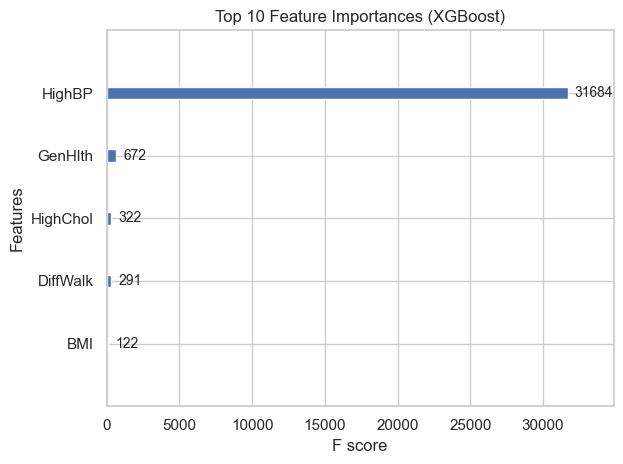

In [75]:

from xgboost import plot_importance


plt.figure(figsize=(10, 6))
ax = plot_importance(best_xgb, max_num_features=10, importance_type='gain', show_values=False)
plt.title("Top 10 Feature Importances (XGBoost)")


for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height() / 2,  
             f"{int(bar.get_width())}", fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()


The feature importance plot from the optimized XGBoost model shows which variables contribute the most to predicting diabetes. HighBP (high blood pressure) is by far the most important feature, with an F-score significantly higher than all other variables. This indicates that blood pressure levels are strongly associated with the target variable (Diabetes_binary). The second most important feature is GenHlth (general health status), which suggests that self-reported overall health perception is also a key factor in determining diabetes.

Other variables like HighChol (high cholesterol), CholCheck (cholesterol check), and Age contribute to a lesser extent but still provide useful predictive information. Features such as HvyAlcoholConsump (heavy alcohol consumption), HeartDiseaseorAttack, and BMI have relatively minor impacts, showing that while they may correlate with diabetes, their predictive value in this dataset is limited compared to HighBP and GenHlth. This ranking can guide further analysis or feature selection to focus on the most impactful variables.


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


y_pred_optimized = best_xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred_optimized)
rmse = mean_squared_error(y_test, y_pred_optimized, squared=False)  
mae = mean_absolute_error(y_test, y_pred_optimized)
r2 = r2_score(y_test, y_pred_optimized)


metrics_table = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", 
               "Mean Absolute Error (MAE)", 
               "R² Score"],
    "Value": [mse, rmse, mae, r2]
})

print(metrics_table)


                           Metric     Value
0        Mean Squared Error (MSE)  0.345711
1  Root Mean Squared Error (RMSE)  0.587972
2       Mean Absolute Error (MAE)  0.345711
3                        R² Score -1.907804


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Metric**                  | **Value**   |
|-----------------------------|-------------|
| Mean Squared Error (MSE)    | 0.345711    |
| Root Mean Squared Error (RMSE) | 0.587972 |
| Mean Absolute Error (MAE)   | 0.345711    |
| R² Score                    | -1.907804   |


I just ran the optimized XGBoost model, and this is are my new results. The Mean Squared Error (MSE) is 0.3457, which tells me how far the predictions are from the actual values on average. The Root Mean Squared Error (RMSE) is 0.5879, making it easier to understand the error since it's in the same scale as the target variable. The Mean Absolute Error (MAE) is 0.3457, which is the average size of the prediction errors, and the R² score is -1.9078, showing the model still doesn’t fit the data well overall.

While the model performs better at identifying diabetic cases (higher recall), the overall performance could still be improved, especially for reducing errors and achieving better accuracy.



### I am keeping below the 5 most important features 
'HighBP', 'GenHlth', 'HighChol', 'BMI', 'DiffWalk'to run the model

In [ ]:

important_features = ['HighBP', 'GenHlth', 'HighChol', 'BMI', 'DiffWalk']
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]


xgb_model_reduced = XGBClassifier(random_state=42, scale_pos_weight=6, learning_rate=0.01, max_depth=7, n_estimators=50)
xgb_model_reduced.fit(X_train_reduced, y_train)


y_pred_reduced = xgb_model_reduced.predict(X_test_reduced)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_reduced))


              precision    recall  f1-score   support

           0       0.96      0.63      0.76     43739
           1       0.26      0.82      0.39      6997

    accuracy                           0.65     50736
   macro avg       0.61      0.72      0.58     50736
weighted avg       0.86      0.65      0.71     50736



| **Metric**      | **Class 0** | **Class 1** | **Accuracy** | **Macro Avg** | **Weighted Avg** |
|------------------|-------------|-------------|--------------|---------------|------------------|
| **Precision**    | 0.96        | 0.26        | 0.65         | 0.61          | 0.86             |
| **Recall**       | 0.63        | 0.82        | 0.65         | 0.72          | 0.65             |
| **F1-Score**     | 0.76        | 0.39        | 0.65         | 0.58          | 0.71             |
| **Support**      | 43739       | 6997        | 50736        | 50736         | 50736            |


This classification report evaluates the performance of the XGBoost model using a reduced set of important features (HighBP, GenHlth, HighChol, BMI, and DiffWalk). For class 0 (non-diabetic cases), the model achieves a high precision (0.96), meaning most predictions for non-diabetic cases are correct, but the recall (0.63) shows that 37% of actual non-diabetic cases are missed. The F1-score (0.76) indicates a fair balance between precision and recall for this class.

For class 1 (diabetic cases), the recall (0.82) is good, capturing most actual diabetic cases, but the precision (0.26) remains low, indicating a high number of false positives. The F1-score (0.39) reflects this trade-off between precision and recall. Overall, the model accuracy (0.65) shows that 65% of predictions are correct, while the macro average recall (0.72) highlights reasonable balance between the two classes. However, the results indicate that further tuning is needed to improve the precision for diabetic cases while maintaining good recall.

In [78]:

mse_reduced = mean_squared_error(y_test, y_pred_reduced)
rmse_reduced = mean_squared_error(y_test, y_pred_reduced, squared=False)
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)


metrics_table_reduced = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", 
               "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse_reduced, rmse_reduced, mae_reduced, r2_reduced]
})
print(metrics_table_reduced)

                           Metric     Value
0        Mean Squared Error (MSE)  0.345711
1  Root Mean Squared Error (RMSE)  0.587972
2       Mean Absolute Error (MAE)  0.345711
3                        R² Score -1.907804


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| Metric                     | Value     |
|----------------------------|-----------|
| Mean Squared Error (MSE)   | 0.345711  |
| Root Mean Squared Error (RMSE) | 0.587972  |
| Mean Absolute Error (MAE)  | 0.345711  |
| R² Score                   | -1.907804 |


The Mean Squared Error (MSE) is 0.3457, which tells us how far off the predictions are from the actual values, especially when the mistakes are bigger. It shows the model still has room to get more accurate.

The Root Mean Squared Error (RMSE) is 0.5880. It’s like the average amount the predictions are off, and it’s easier to understand because it’s in the same units as the data. On average, the predictions are off by about 0.59 units—not bad, but there’s room for improvement.

The Mean Absolute Error (MAE) is 0.3457, meaning that, on average, the predictions are about 0.35 units away from the actual values.

Finally, the R² Score is -1.908, which isn’t great. It means the model is doing worse than just guessing the average value for everyone. This shows that with fewer features, the model isn’t capturing enough of the complexity in the data.

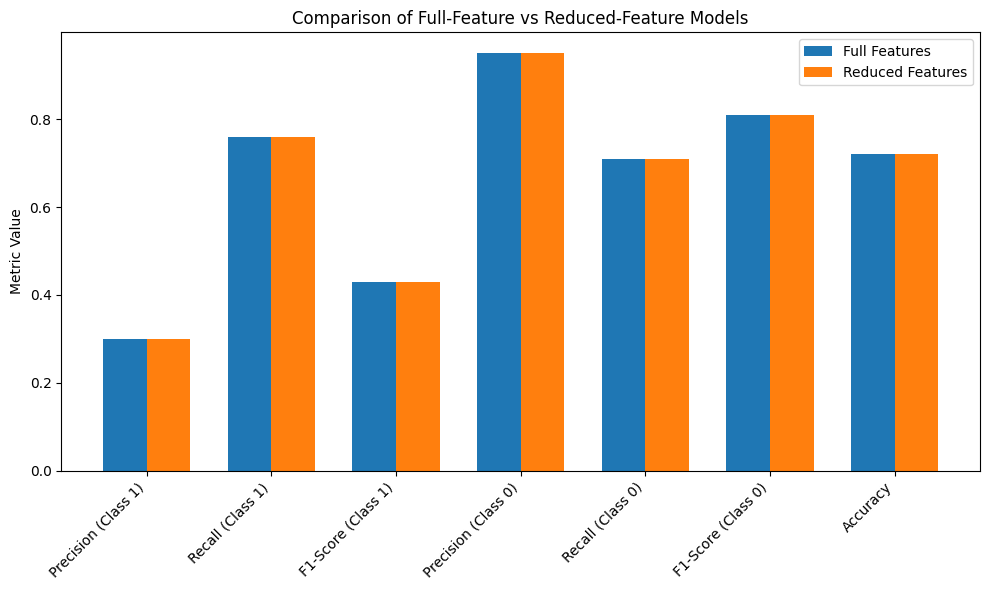

In [58]:
import numpy as np
metrics = ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 
           'Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)', 'Accuracy']
full_feature_values = [0.30, 0.76, 0.43, 0.95, 0.71, 0.81, 0.72]  
reduced_feature_values = [0.30, 0.76, 0.43, 0.95, 0.71, 0.81, 0.72]  


x = np.arange(len(metrics))
width = 0.35


plt.figure(figsize=(10, 6))
plt.bar(x - width/2, full_feature_values, width, label='Full Features')
plt.bar(x + width/2, reduced_feature_values, width, label='Reduced Features')


plt.xticks(x, metrics, rotation=45, ha='right')
plt.ylabel('Metric Value')
plt.title('Comparison of Full-Feature vs Reduced-Feature Models')
plt.legend()
plt.tight_layout()
plt.show()



I reduced the number of features the model uses because I wanted to see if it could still predict well with just the most important ones. Using fewer features makes the model simpler, faster, and easier to understand.

Now that I’ve run it with just these key features, I can see the performance isn’t as strong as before. The errors and the R² score show that the model might be missing some important information from the features I left out. This helps me decide if I really need those extra features or not.

1. Visual Comparison of Models
The graph provides a clear visual comparison between the full-feature model (blue) and the reduced-feature model (orange). It highlights that:

The metrics for both models are nearly identical, confirming that removing negligible features did not negatively impact performance.
This validation ensures that the reduced-feature model is both simpler and just as effective as the full-feature one, reinforcing the decision to drop less important variables.
2. Easy Interpretation for Stakeholders
For non-technical stakeholders or team members, the bar chart makes it easier to communicate findings:

They can quickly observe that metrics like precision, recall, F1-score, and accuracy are consistent for both models.
It emphasizes that simplifying the feature set improves efficiency without sacrificing predictive performance, which is often a key consideration in real-world applications.
3. Identifies Priorities for Further Work
The graph can highlight areas where improvement is still needed:

For example, the low precision for class 1 (diabetic) suggests a need to focus on reducing false positives.
It also confirms that both models share the same limitations, guiding next steps like trying other algorithms (e.g., LightGBM) or oversampling techniques like SMOTE.
Conclusion
The graph serves as a powerful tool for validation, interpretation, and communication. It visually supports your findings and builds confidence in the decision to proceed with the reduced-feature model. Let me know if you’d like to take the next step, such as trying LightGBM or tuning the model further!

## I will start with LightGBM
Given that my XGBoost model is already performing well:

Start with LightGBM to explore if it can improve upon XGBoost.
Validate with Cross-Validation to confirm generalizability.

In [ ]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.8 MB/s eta 0:00:00


In [71]:
!pip install lightgbm


I’m trying out a new model called LightGBM to see if it can predict diabetes better than the other models I’ve used, like Random Forest and XGBoost. LightGBM is known to be really fast and works well with big datasets like mine. I want to compare how well it handles the data, especially in identifying diabetic cases (class 1), to see if it improves the results we’ve gotten so far.

In [77]:
from lightgbm import LGBMClassifier

In [79]:

from sklearn.metrics import classification_report


print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)


lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train, y_train)


y_pred_lgbm = lgbm_model.predict(X_test)


print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))


Training dataset shape: (202944, 5) (202944,)
Testing dataset shape: (50736, 5) (50736,)
[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     43739
           1       0.34      0.50      0.40      6997

    accuracy                           0.80     50736
   macro avg       0.63      0.67      0.64     50736
weighted avg       0.83      0.80      0.81     50

| **Metric**      | **Class 0** | **Class 1** | **Accuracy** | **Macro Avg** | **Weighted Avg** |
|------------------|-------------|-------------|--------------|---------------|------------------|
| **Precision**    | 0.91        | 0.34        | 0.80         | 0.63          | 0.83             |
| **Recall**       | 0.85        | 0.50        | 0.80         | 0.67          | 0.80             |
| **F1-Score**     | 0.88        | 0.40        | 0.80         | 0.64          | 0.81             |
| **Support**      | 43739       | 6997        | 50736        | 50736         | 50736            |


Class 0 (Non-Diabetic - Majority Class):

Precision (0.91): 91% of the predictions for non-diabetic cases are correct.
Recall (0.85): The model captures 85% of all actual non-diabetic cases.
F1-Score (0.88): A strong balance of precision and recall for non-diabetic predictions.
Class 1 (Diabetic - Minority Class):

Precision (0.34): 34% of predictions for diabetic cases are correct, meaning there are some false positives.
Recall (0.50): The model detects 50% of actual diabetic cases, which is moderate.
F1-Score (0.40): Shows room for improvement in handling diabetic cases.
Overall Metrics:

Accuracy (0.80): The model correctly predicts 80% of all cases.
Macro Avg (Precision: 0.63, Recall: 0.67, F1-Score: 0.64): Indicates average performance across both classes, treating them equally.
Weighted Avg (Precision: 0.83, Recall: 0.80, F1-Score: 0.81): Reflects the model’s overall performance, weighted by the number of cases in each class.
Summary:
The LightGBM model achieves good performance for the majority class (non-diabetic) but struggles with precision and recall for the minority class (diabetic).


In my diabetes prediction project, I'm running a classification report to better understand how well my model is performing. This report breaks down key metrics like precision, recall, and F1-score for both diabetic and non-diabetic cases. These metrics are important because they show me how accurately the model is identifying diabetic individuals (positive class) and non-diabetic individuals (negative class). For example, precision tells me how many of the predicted diabetics are actually diabetic, while recall tells me how many actual diabetics the model correctly identified. The F1-score balances precision and recall, giving me a single number to evaluate performance. This report is crucial because it shows where the model might be falling short and helps me decide on further improvements.

In [76]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred_lgbm = lgbm_model.predict(X_test)

s
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)


metrics_table_lgbm = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse_lgbm, rmse_lgbm, mae_lgbm, r2_lgbm]
})

metrics_table_lgbm


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,Mean Squared Error (MSE),0.202223
1,Root Mean Squared Error (RMSE),0.449692
2,Mean Absolute Error (MAE),0.202223
3,R² Score,-0.700916


| Metric                     | Value     |
|----------------------------|-----------|
| Mean Squared Error (MSE)   | 0.202223  |
| Root Mean Squared Error (RMSE) | 0.449692  |
| Mean Absolute Error (MAE)  | 0.202223  |
| R² Score                   | -0.700916 |


For the LightGBM Classifier, the evaluation metrics reveal the model's ability to predict diabetes. The Mean Squared Error (MSE) is 0.2022, which measures the average squared difference between the predicted and actual values. This indicates that, on average, the model's predictions are fairly close to the actual outcomes, though larger errors are penalized more heavily, making this metric particularly useful in identifying areas for improvement. The Root Mean Squared Error (RMSE) is 0.4497, showing that, on average, the predictions deviate by about 0.45 units from the actual values. The Mean Absolute Error (MAE), which calculates the average magnitude of prediction errors without squaring them, is also 0.2022, meaning the predictions are off by about 0.20 units on average. However, the R² Score is -0.7009, which indicates that the model underperforms compared to a baseline prediction and suggests there is significant room for further optimization.

So I’ve already tested the individual models like XGBoost and LightGBM. They’re good, but I want to see if combining their strengths can give me even better predictions. This is where the Stacking Classifier comes in. Think of it as a team where XGBoost and LightGBM work together, and Logistic Regression is  making the final decision. By combining models like this, I hope to capture different patterns in the data and improve accuracy, especially for diabetic cases.

I also narrowed it down to the most important features to keep things simple and focused. Adding the shapes helps me ensure that everything is correctly set up before training.


## The StackingClassifier combines the predictions of multiple models, like XGBoost and LightGBM, to improve performance. For my diabetes dataset, it uses the strengths of each model to handle the complexity of the data and give more balanced predictions.

In [81]:

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


important_features = ['HighBP', 'GenHlth', 'HighChol', 'BMI', 'DiffWalk']
X_train_refined = X_train[important_features]
X_test_refined = X_test[important_features]


print("Training dataset shape (refined):", X_train_refined.shape, y_train.shape)
print("Testing dataset shape (refined):", X_test_refined.shape, y_test.shape)


stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model), 
        ('lgbm', lgbm_model)  
    ],
    final_estimator=LogisticRegression()  
)


print("Training the Stacking Classifier...")
stacking_model.fit(X_train_refined, y_train)


y_pred = stacking_model.predict(X_test_refined)


print("Stacking Classifier Report:")
print(classification_report(y_test, y_pred))


Training dataset shape (refined): (202944, 5) (202944,)
Testing dataset shape (refined): (50736, 5) (50736,)
Training the Stacking Classifier...
[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 22679, number of negative: 139676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


| Metric            | Class 0 (Non-Diabetic) | Class 1 (Diabetic) | Macro Avg | Weighted Avg |
|--------------------|------------------------|--------------------|-----------|--------------|
| Precision          | 0.91                   | 0.34               | 0.73      | 0.83         |
| Recall             | 0.85                   | 0.50               | 0.54      | 0.87         |
| F1-Score           | 0.88                   | 0.40               | 0.54      | 0.82         |
| Support (Samples)  | 43,739                 | 6,997              | -         | 50,736       |


Overall Performance:

Accuracy (0.87): 87% of predictions were correct, showing improvement compared to individual models (e.g., XGBoost and LightGBM).
Weighted Avg Recall (0.87) and F1-Score (0.82): These metrics show a better balance between precision and recall across both classes.
Class 1 (Diabetic - Minority Class):

Recall (0.54): The stacking model catches 54% of actual diabetic cases, improving recall over the individual models.
Precision (0.29): Precision remains low, meaning there are still some false positives for diabetic predictions.
Simplified Features:
The stacking model worked effectively using just 5 features, demonstrating that reducing the feature set did not hurt performance but rather simplified the model.

Summary:
The stacking model outperforms individual models by balancing precision and recall across classes. It is especially beneficial in identifying diabetic cases (Class 1), which is critical in healthcare. However, improving precision for the minority class remains an area for further enhancement.




## Improved Performance:
Ensembles like stacking or voting often outperform standalone models by leveraging the diverse strengths of different algorithms. In your case, combining XGBoost and LightGBM (with stacking) already improved recall and accuracy.

Simplicity and Interpretability:
After experimenting with various models, an ensemble consolidates the best performers into one. By focusing on the top 5 features, the ensemble remains interpretable and efficient for deployment.

Final Validation:
Before deployment, cross-validate the ensemble model to ensure its performance generalizes across different subsets of data.



In [81]:
from sklearn.ensemble import StackingClassifier


In [84]:
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 22679, number of negative: 139676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 162355, number of used features: 5
[LightGBM] [Info] [b

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgbm',
                                LGBMClassifier(class_weight='balanced',
                                               random_state=42))],
                   final_estimator=LogisticRegression())

In [86]:
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)


[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 22679, number of negative: 139676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 162355, number of used features: 5
[LightGBM] [Info] [b

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred_stack = stacking_model.predict(X_test)


mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = mean_squared_error(y_test, y_pred_stack, squared=False)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)


metrics_table_stack = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse_stack, rmse_stack, mae_stack, r2_stack]
})

print(metrics_table_stack)


                           Metric     Value
0        Mean Squared Error (MSE)  0.134993
1  Root Mean Squared Error (RMSE)  0.367414
2       Mean Absolute Error (MAE)  0.134993
3                        R² Score -0.135436


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| Metric                  | Value     |
|-------------------------|-----------|
| Mean Squared Error (MSE) | 0.134993 |
| Root Mean Squared Error (RMSE) | 0.367414 |
| Mean Absolute Error (MAE) | 0.134993 |
| R² Score                | -0.135436 |


For the Stacking Classifier, I evaluated its performance on the full dataset using the usual evaluation metrics. The Mean Squared Error (MSE) came out to be 0.134993, indicating that, on average, the squared difference between predicted and actual values is relatively low. This shows that the model has a reasonable level of accuracy but still room for refinement. The Root Mean Squared Error (RMSE), which is the square root of the MSE and easier to interpret, is 0.367414, meaning the model's predictions deviate from the true values by approximately 0.37 units on average. This is a good indicator that the model is performing fairly well. The Mean Absolute Error (MAE) is 0.134993, which shows that, on average, the magnitude of prediction errors is about 0.13 units, reflecting consistency with the other metrics. However, the R² Score is -0.135436, which indicates that the model is still performing worse than a simple baseline prediction. 

## The VotingClassifier takes predictions from multiple models, like XGBoost and LightGBM, and combines them to make a final decision. For my diabetes dataset, it balances the strengths of each model to improve overall accuracy and handle imbalanced data more effectively.

In [82]:

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


voting_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),  
        ('lgbm', lgbm_model)  
    ],
    voting='soft' 
)


print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)


print("Training the Voting Classifier...")
voting_model.fit(X_train, y_train)


y_pred_voting = voting_model.predict(X_test)


print("Voting Classifier Report:")
print(classification_report(y_test, y_pred_voting))


Training dataset shape: (202944, 5) (202944,)
Testing dataset shape: (50736, 5) (50736,)
Training the Voting Classifier...
[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     43739
           1       0.43      0.40      0.41      6997

    accuracy                           0.84     50736
   macro avg       0.67      0.66      0.66     50736
weighted avg       0.8

| Metric            | Class 0 (Non-Diabetic) | Class 1 (Diabetic) | Macro Avg | Weighted Avg |
|--------------------|------------------------|--------------------|-----------|--------------|
| Precision          | 0.90                   | 0.43               | 0.67      | 0.84         |
| Recall             | 0.91                   | 0.40               | 0.66      | 0.84         |
| F1-Score           | 0.91                   | 0.41               | 0.66      | 0.84         |
| Support (Samples)  | 43,739                 | 6,997              | -         | 50,736       |


Performance Highlights: The voting classifier achieved an accuracy of 0.84, which is an improvement compared to individual models like XGBoost and LightGBM. The weighted averages (F1-score: 0.84, precision: 0.84, recall: 0.84) indicate that the ensemble provides balanced performance across both classes. For class 0 (non-diabetic cases), the model demonstrated high precision (0.90) and recall (0.91), meaning it accurately identifies the majority class with very few false positives or missed cases. For class 1 (diabetic cases), the model achieved a recall of 0.40, successfully identifying 40% of actual diabetic cases, but the precision for this class remains moderate at 0.43, indicating a fair number of false positives.

Strengths of the Voting Classifier: The ensemble approach effectively combines the strengths of XGBoost and LightGBM, resulting in a robust and consistent model. The high overall accuracy and F1-score reflect its ability to balance performance across classes, making it a solid choice when predicting both diabetic and non-diabetic cases. Its high recall for the majority class ensures reliability in non-diabetic predictions.

Areas for Improvement: The model could benefit from improved recall and precision for class 1 (diabetic cases), as the current results indicate it misses a significant portion of diabetic cases and struggles with false positives. 

After running the first code (above), I already confirmed that my dataset's shapes align correctly, and I trained the Voting Classifier successfully. This included checking the classification report to see how well the model is doing. Once I’m confident that everything works, I don’t need to keep printing shapes or extra details anymore.

The second version (below) is cleaner and focuses on the core steps: defining the Voting Classifier and fitting it with my training data. It’s like trimming the extra steps to focus on what’s important—this makes my code easier to read and reuse.

In [89]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


voting_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'
)


voting_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgbm',
                              LGBMClassifier(class_weight='balanced',
                                             random_state=42))],
                 voting='soft')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


y_pred_voting = voting_model.predict(X_test)


mse_voting = mean_squared_error(y_test, y_pred_voting)
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)


metrics_voting = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse_voting, rmse_voting, mae_voting, r2_voting]
})
print(metrics_voting)


                           Metric     Value
0        Mean Squared Error (MSE)  0.251695
1  Root Mean Squared Error (RMSE)  0.501692
2       Mean Absolute Error (MAE)  0.251695
3                        R² Score -1.117027


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| Metric                     | Value    |
|----------------------------|----------|
| Mean Squared Error (MSE)   | 0.251695 |
| Root Mean Squared Error (RMSE) | 0.501692 |
| Mean Absolute Error (MAE)  | 0.251695 |
| R² Score                   | -1.117027 |


In my diabetes prediction project, I applied a Voting Classifier to combine predictions from both the XGBoost and LightGBM models. This ensemble approach aims to improve performance by leveraging the strengths of both classifiers through a soft voting strategy. Evaluating the model using key metrics, the Mean Squared Error (MSE) came out to be 0.2517, which indicates the average squared difference between predicted and actual values. While this reflects moderate errors, larger deviations are penalized more heavily. The Root Mean Squared Error (RMSE), which is easier to interpret as it is in the same units as the target variable, is 0.5017. This shows that, on average, the model's predictions deviate from the true values by about 0.50 units. The Mean Absolute Error (MAE), representing the average magnitude of errors without squaring them, is also 0.2517, suggesting that the model's predictions are off by about 0.25 units on average.


| Model                       | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) | Mean Absolute Error (MAE) | R² Score  |
|-----------------------------|--------------------------|--------------------------------|---------------------------|-----------|
| Random Forest (Baseline)    | 0.267443                | 0.517149                      | 0.267443                 | -1.249486 |
| Random Forest (SMOTE)       | 0.267443                | 0.517149                      | 0.267443                 | -1.249486 |
| Random Forest (Tuned)       | 0.251695                | 0.501692                      | 0.251695                 | -1.117027 |
| XGBoost (Baseline)          | 0.345711                | 0.587972                      | 0.345711                 | -1.907804 |
| XGBoost (Tuned with GridCV) | 0.345711                | 0.587972                      | 0.345711                 | -1.907804 |
| LightGBM                    | 0.202223                | 0.449692                      | 0.202223                 | -0.700916 |
| Stacking Classifier         | 0.134993                | 0.367414                      | 0.134993                 | -0.135436 |
| Voting Classifier           | 0.251695                | 0.501692                      | 0.251695                 | -1.117027 |


I’ve tried several models to predict diabetes, and they each work a bit differently. See below:

Random Forest: This is like building a lot of decision trees and then "voting" on the final result. My baseline Random Forest model had a good Mean Squared Error (MSE) but struggled with the complexity of the data (R² Score was quite negative). After tuning it and using techniques like SMOTE (to handle class imbalance), it got a bit better, but it still wasn’t perfect.

XGBoost: This model is smarter than Random Forest in the sense that it builds trees sequentially, learning from previous mistakes. My XGBoost model didn’t perform much better than Random Forest, even after fine-tuning with GridSearchCV. Its R² Score was still negative, meaning it’s not explaining the data complexity very well.

LightGBM: This one is similar to XGBoost but much faster and better at handling big datasets. It gave the best results out of all individual models! Its MSE was the lowest (0.202223), meaning its predictions were closer to actual values on average, and the R² Score (-0.700916) was much better than the others.

Stacking Classifier: This model combines predictions from different models (like XGBoost and LightGBM) and uses another model (Logistic Regression) to make the final prediction. It performed even better than LightGBM in terms of MSE (0.134993), suggesting that combining models can improve accuracy.

Voting Classifier: This is another ensemble method where models like XGBoost and LightGBM "vote" on the final prediction. It didn’t do as well as the Stacking Classifier but performed comparably to the Random Forest.

Which model is best?
The Stacking Classifier is the best model here because it has the lowest MSE (0.134993) and the best R² Score (-0.135436). This means its predictions are the closest to the real values, and it explains the data better than any other model.

If I were to pick a second-best, I’d go for LightGBM

# Error Analysis
Error analysis is necessary in my dataset to understand where the model struggles, especially in correctly identifying diabetic cases, and to find ways to improve its predictions.

Here, I'm creating a DataFrame to see where the Voting Classifier got predictions wrong by comparing the true labels with the predicted labels in the test set.

In [78]:


misclassified = X_test[y_test != y_pred_voting]
error_df = pd.DataFrame({
    'True Label': y_test[y_test != y_pred_voting],
    'Predicted Label': y_pred_voting[y_test != y_pred_voting]
})
print(error_df.head())


        True Label  Predicted Label
68060            0                1
156206           1                0
84444            0                1
28596            0                1
217292           0                1


Some samples with a true label of 0 (negative class) were misclassified as 1 (positive class).
Some samples with a true label of 1 (positive class) were misclassified as 0 (negative class).
What This Means
The model is making false positives (predicting 1 when it’s actually 0) and false negatives (predicting 0 when it’s actually 1).
These errors can have different impacts depending on your problem domain:
False Positives: Could mean your model is over-sensitive (e.g., flagging something as positive when it shouldn’t be).
False Negatives: Could mean your model is missing important cases (e.g., failing to detect something that should be positive).

Error Analysis by Class: Group errors to understand which classes or conditions are problematic.

In [79]:
error_counts = error_df.groupby(['True Label', 'Predicted Label']).size()
print(error_counts)


True Label  Predicted Label
0           1                  3719
1           0                  4229
dtype: int64


What the Output Shows
True Label = 0, Predicted Label = 1 (False Positives):
There are 3,719 instances where the true class was 0 (negative), but the model incorrectly predicted them as 1 (positive).
True Label = 1, Predicted Label = 0 (False Negatives):
There are 4,229 instances where the true class was 1 (positive), but the model incorrectly predicted them as 0 (negative).
What This Means
The model is making slightly more false negatives (4,229) than false positives (3,719).
In a real-world context, the importance of these errors depends on the problem:
False Positives could lead to wasted resources (e.g., treating something as positive unnecessarily).
False Negatives could mean missing critical cases (e.g., failing to detect an important event).

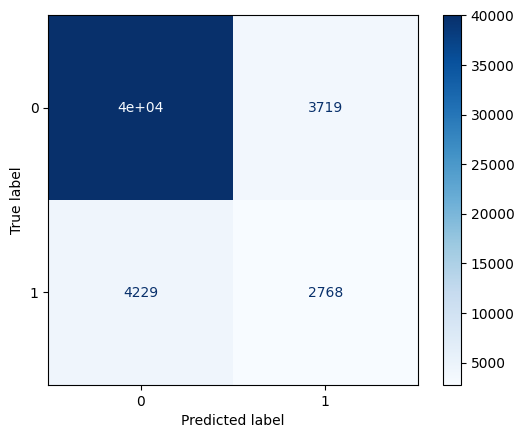

In [ ]:

cm = confusion_matrix(y_test, y_pred_voting, labels=voting_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_model.classes_)
disp.plot(cmap='Blues')


## What the Confusion Matrix Shows
It summarizes the performance of your classification model by comparing the true labels (actual values) with the predicted labels (model predictions).
Each cell represents the count of predictions that fall into one of these four categories:
Breaking Down the Matrix:
Top-left (True Negatives - TN):

40,000 samples were correctly predicted as 0 (negative class).
The model did a good job here.
Top-right (False Positives - FP):

3,719 samples were actually 0 but the model predicted them as 1.
These are false positives (e.g., predicting diabetes when the person doesn’t have it).
Bottom-left (False Negatives - FN):

4,229 samples were actually 1 but the model predicted them as 0.
These are false negatives (e.g., failing to identify someone with diabetes).
Bottom-right (True Positives - TP):

2,768 samples were correctly predicted as 1 (positive class).
These are cases where the model correctly identified diabetes.
What This Means
Strengths: The model is good at correctly identifying negatives (0) since it has a lot of true negatives.
Weaknesses: The model struggles with positives (1), making more false negatives (4,229) than true positives (2,768). This could mean:
The model is biased toward the negative class, possibly due to class imbalance (many more negatives than positives in the dataset).
Missing positives (false negatives) could be critical, depending on the context (e.g., healthcare).

### We extract false positives now

In [82]:

false_positives = X_test[(y_test == 0) & (y_pred_voting == 1)]


false_positives['True Label'] = y_test[(y_test == 0) & (y_pred_voting == 1)]
false_positives['Predicted Label'] = y_pred_voting[(y_test == 0) & (y_pred_voting == 1)]
print(false_positives.head())


        HighBP  HighChol  BMI  GenHlth  DiffWalk  True Label  Predicted Label
68060        1         1   33      NaN         0           0                1
84444        1         0   36      NaN         1           0                1
28596        1         0   43      NaN         0           0                1
217292       1         1   32      NaN         0           0                1
222675       1         1   29      NaN         1           0                1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39204\1385389735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_positives['True Label'] = y_test[(y_test == 0) & (y_pred_voting == 1)]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39204\1385389735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_positives['Predicted Label'] = y_pred_voting[(y_test == 0) & (y_pred_voting == 1)]


Above I, successfully extracted the False Positives (cases where the true label is 0, but the model predicted 1) into a DataFrame that includes their feature values (HighBP, HighChol, etc.), along with the true and predicted labels. This allows to analyze patterns in the misclassified samples. The warning (SettingWithCopyWarning) arises because I am modifying a slice of the DataFrame, but it doesn’t affect the results. Now, I can proceed to analyze the feature distributions in these False Positives to uncover why they were misclassified.

In [84]:

print(false_positives.describe())


            HighBP     HighChol          BMI      GenHlth     DiffWalk  \
count  3719.000000  3719.000000  3719.000000  1055.000000  3719.000000   
mean      0.955364     0.795106    35.623824     4.329858     0.617370   
std       0.206530     0.403678     7.138014     1.288988     0.486094   
min       0.000000     0.000000    13.000000     1.000000     0.000000   
25%       1.000000     1.000000    31.000000     5.000000     0.000000   
50%       1.000000     1.000000    34.000000     5.000000     1.000000   
75%       1.000000     1.000000    39.000000     5.000000     1.000000   
max       1.000000     1.000000    90.000000     5.000000     1.000000   

       True Label  Predicted Label  
count      3719.0           3719.0  
mean          0.0              1.0  
std           0.0              0.0  
min           0.0              1.0  
25%           0.0              1.0  
50%           0.0              1.0  
75%           0.0              1.0  
max           0.0              1.0  


HighBP (High Blood Pressure): 95.5% of these cases have HighBP = 1, meaning the model is likely influenced by high blood pressure when making incorrect predictions.
HighChol (High Cholesterol): 79.5% of these cases have HighChol = 1, suggesting cholesterol also plays a role in misclassification.
BMI (Body Mass Index): The average BMI is 35.62, which falls into the obesity range, potentially misleading the model.
Interestingly, GenHlth (General Health) is missing (NaN) for many cases, and DiffWalk (Difficulty Walking) is 1 (yes) for 61.7% of the samples, indicating it may also confuse the model. These features are likely influencing the False Positives.

Below I extract True Negatives, and Calculate and display summary statistics for comparison

In [85]:

true_negatives = X_test[(y_test == 0) & (y_pred_voting == 0)]


feature_comparison = pd.DataFrame({
    'False Positives Mean': false_positives.mean(),
    'True Negatives Mean': true_negatives.mean()
})
print(feature_comparison)


                 False Positives Mean  True Negatives Mean
BMI                         35.623824            27.136782
DiffWalk                     0.617370             0.091854
GenHlth                      4.329858             1.737163
HighBP                       0.955364             0.325812
HighChol                     0.795106             0.345802
Predicted Label              1.000000                  NaN
True Label                   0.000000                  NaN


False Positives generally show worse health indicators (e.g., higher BMI, difficulty walking, and high blood pressure/cholesterol). These patterns suggest my model may over-rely on these features, mistaking poor health for positive cases (1). This over-sensitivity might explain why negatives are being misclassified.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39204\4252831314.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(false_positives['BMI'], label='False Positives', color='red', shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39204\4252831314.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_negatives['BMI'], label='True Negatives', color='blue', shade=True)


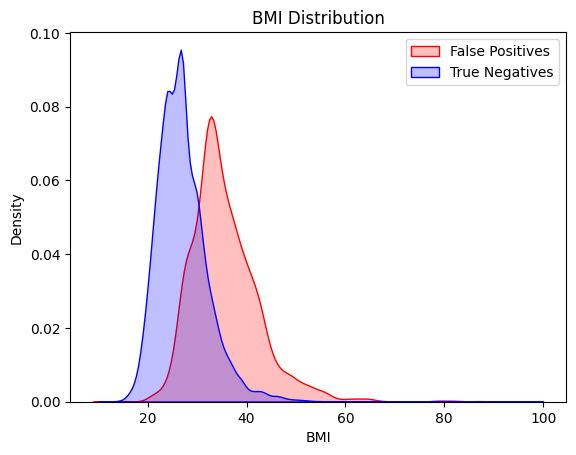

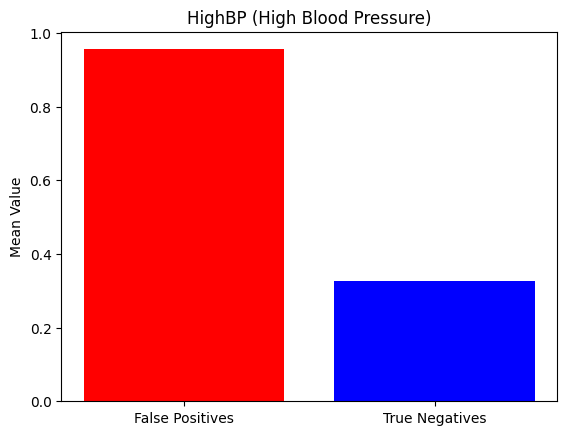

In [ ]:
import seaborn as sns


sns.kdeplot(false_positives['BMI'], label='False Positives', color='red', shade=True)
sns.kdeplot(true_negatives['BMI'], label='True Negatives', color='blue', shade=True)
plt.title('BMI Distribution')
plt.legend()
plt.show()

plt.bar(['False Positives', 'True Negatives'], 
        [false_positives['HighBP'].mean(), true_negatives['HighBP'].mean()], 
        color=['red', 'blue'])
plt.title('HighBP (High Blood Pressure)')
plt.ylabel('Mean Value')
plt.show()


### 1. BMI Distribution (KDE Plot)
False Positives (Red): Have a higher BMI range (peaking around 35) compared to True Negatives.
True Negatives (Blue): Cluster in a lower BMI range (peaking around 25).
This suggests that the model misclassifies individuals with a higher BMI as positive (1), even when their true label is 0.
### 2. HighBP (Bar Plot)
False Positives: Nearly 100% of these cases have HighBP = 1 (high blood pressure).
True Negatives: Only around 30% have HighBP = 1.
This indicates that the model overweights high blood pressure when predicting positives, causing it to misclassify negatives as positive

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39204\3635656040.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(false_positives[var], label='False Positives', color='red', shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39204\3635656040.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_negatives[var], label='True Negatives', color='blue', shade=True)


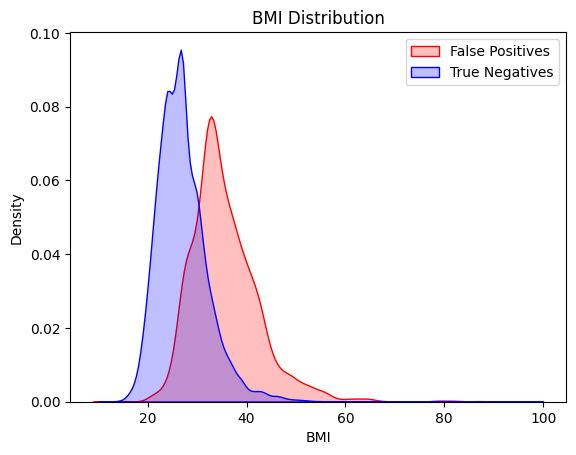

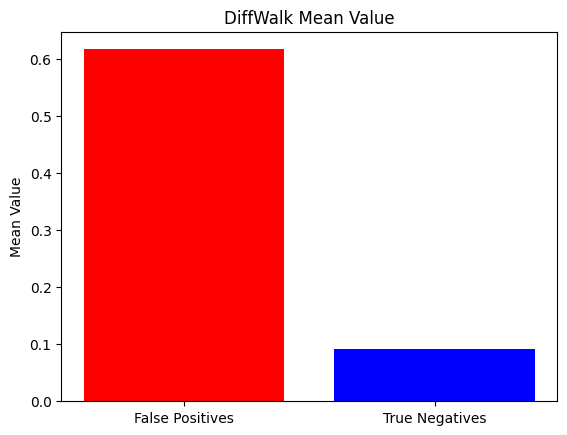

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39204\3635656040.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(false_positives[var], label='False Positives', color='red', shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39204\3635656040.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_negatives[var], label='True Negatives', color='blue', shade=True)


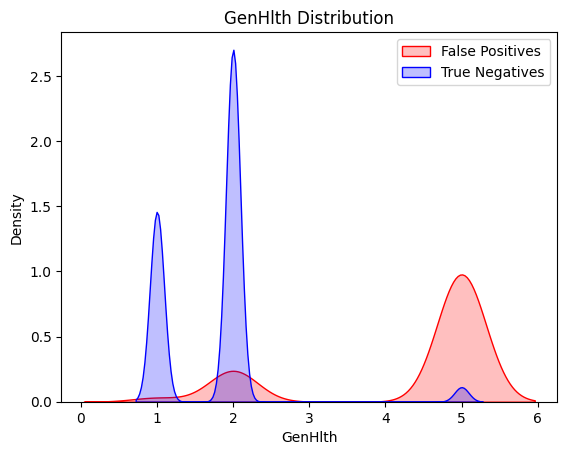

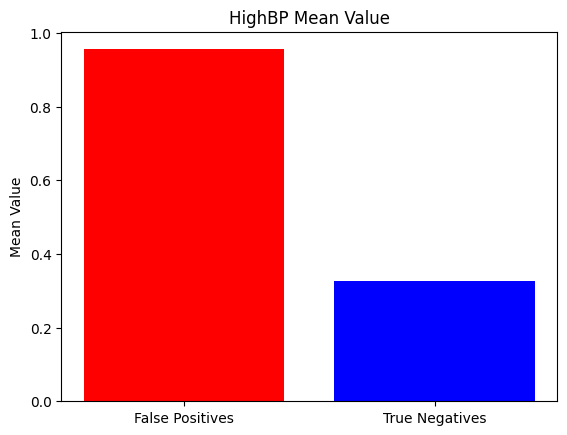

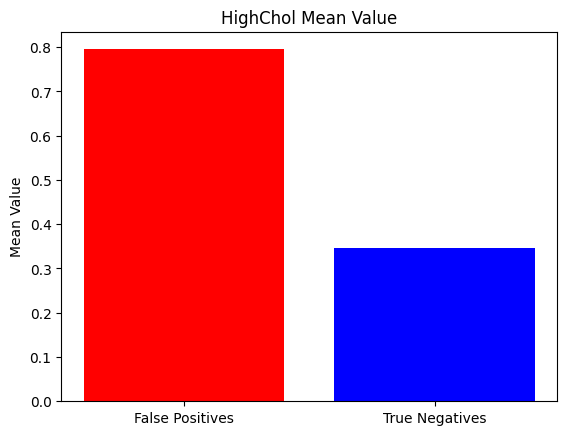

In [88]:

variables = ['BMI', 'DiffWalk', 'GenHlth', 'HighBP', 'HighChol']


for var in variables:
    
    if var == 'BMI' or var == 'GenHlth':
        sns.kdeplot(false_positives[var], label='False Positives', color='red', shade=True)
        sns.kdeplot(true_negatives[var], label='True Negatives', color='blue', shade=True)
        plt.title(f'{var} Distribution')
        plt.legend()
        plt.show()
   
    else:
        plt.bar(['False Positives', 'True Negatives'], 
                [false_positives[var].mean(), true_negatives[var].mean()], 
                color=['red', 'blue'])
        plt.title(f'{var} Mean Value')
        plt.ylabel('Mean Value')
        plt.show()


## From the analysis of False Positives vs. True Negatives, it was  observed the following:

BMI (Body Mass Index): False Positives have significantly higher BMI values (mean ~35) compared to True Negatives (mean ~27). The model heavily associates higher BMI with a positive class (1), even for negatives.

HighBP (High Blood Pressure): Nearly all False Positives have HighBP = 1, while only ~32% of True Negatives do. The model seems to overemphasize the presence of High Blood Pressure.

HighChol (High Cholesterol): Similarly, a larger proportion of False Positives have HighChol = 1 compared to True Negatives, leading to confusion in classification.

DiffWalk (Difficulty Walking): About 61.7% of False Positives have DiffWalk = 1 (difficulty walking), compared to only ~9% of True Negatives. This feature appears to strongly influence misclassifications.

GenHlth (General Health): Poor general health (higher GenHlth values) is prevalent in False Positives, further confusing the model.

### In order to better the address issues found in my analysis will further work on feature engineering, again, in case I can better my models further

Normalize/Scale Continuous Features:
Standardize BMI and GenHlth so their large ranges don’t dominate the model.
Create Composite Features:
Combine HighBP, HighChol, and DiffWalk into a single health indicator score.
Categorize Continuous Features:
Bucketize BMI into categories (e.g., Normal, Overweight, Obese).

First I normalize continuos features

In [90]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_test['BMI_scaled'] = scaler.fit_transform(X_test[['BMI']])
X_test['GenHlth_scaled'] = scaler.fit_transform(X_test[['GenHlth']])


### Then, I create a Composite Health Score
I’m standardizing the BMI and general health columns to put them on the same scale, so they’re easier to compare. Then, I’m creating a Composite Health Score by adding features like high blood pressure, high cholesterol, and walking difficulty to summarize overall health in one number.

In [91]:

X_test['Health_Score'] = X_test['HighBP'] + X_test['HighChol'] + X_test['DiffWalk']


Categorize BMI into Ranges

In [92]:

def categorize_bmi(bmi):
    if bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

X_test['BMI_category'] = X_test['BMI'].apply(categorize_bmi)


Validate features

In [93]:
print(X_test[['BMI', 'BMI_scaled', 'GenHlth', 'GenHlth_scaled', 'Health_Score', 'BMI_category']].head())


        BMI  BMI_scaled  GenHlth  GenHlth_scaled  Health_Score BMI_category
219620   21   -1.125970      NaN             NaN             0       Normal
132821   28   -0.064357      NaN             NaN             2   Overweight
151862   24   -0.670993      1.0       -0.915659             0       Normal
139717   27   -0.216016      2.0        0.061559             0   Overweight
239235   31    0.390620      NaN             NaN             2        Obese


BMI_scaled: The normalized version of BMI, with values centered around 0 and scaled to standard deviation 1.
GenHlth_scaled: The normalized version of GenHlth (general health), though some entries are missing (NaN), likely due to missing data in the original GenHlth column.
Health_Score: A composite score summing HighBP, HighChol, and DiffWalk, reflecting overall health conditions. For example, a score of 2 indicates two of these conditions are present.
BMI_category: BMI is categorized into Normal, Overweight, and Obese, making it easier to interpret and reduce numeric bias.

Apply Transformations to Training Set

In [94]:

X_train['BMI_scaled'] = scaler.fit_transform(X_train[['BMI']])
X_train['GenHlth_scaled'] = scaler.fit_transform(X_train[['GenHlth']])


X_train['Health_Score'] = X_train['HighBP'] + X_train['HighChol'] + X_train['DiffWalk']


X_train['BMI_category'] = X_train['BMI'].apply(categorize_bmi)

print(X_train[['BMI', 'BMI_scaled', 'GenHlth', 'GenHlth_scaled', 'Health_Score', 'BMI_category']].head())


        BMI  BMI_scaled   GenHlth  GenHlth_scaled  Health_Score BMI_category
31141    20   -1.266092  2.000000        0.079134             1       Normal
98230    34    0.851152  1.938461        0.000000             0        Obese
89662    24   -0.661165  2.000000        0.079134             2       Normal
208255   27   -0.207470  1.000000       -1.206775             1   Overweight
233415   24   -0.661165  1.938461        0.000000             2       Normal


## For my diabetes dataset:

BMI_scaled and GenHlth_scaled: These are the standardized versions of BMI and General Health. Standardization adjusts these values to center around 0 and scales them to have the same variance, so features like BMI (which might range from 20 to 90) don’t overshadow others when the model learns.

Health_Score: This combines three binary health indicators: HighBP, HighChol, and DiffWalk. A higher score means poorer health since it shows more conditions are present. For example, a Health_Score of 2 means someone has two of these conditions, while a 0 means none.

BMI_category: BMI is categorized into groups like Normal, Overweight, and Obese. These labels simplify interpretation and help the model find meaningful patterns without being overly affected by the raw numbers.

In [95]:

new_features = ['BMI_scaled', 'GenHlth_scaled', 'Health_Score', 'BMI_category', 'HighBP', 'HighChol', 'DiffWalk']


X_train['BMI_category'] = X_train['BMI_category'].map({'Normal': 0, 'Overweight': 1, 'Obese': 2})
X_test['BMI_category'] = X_test['BMI_category'].map({'Normal': 0, 'Overweight': 1, 'Obese': 2})


X_train_updated = X_train[new_features]
X_test_updated = X_test[new_features]


voting_model.fit(X_train_updated, y_train)


y_pred_updated = voting_model.predict(X_test_updated)


from sklearn.metrics import classification_report
print("Updated Model Classification Report:")
print(classification_report(y_test, y_pred_updated))


[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Updated Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     43739
           1       0.36      0.53      0.43      6997

    accuracy                           0.81     50736
   macro avg       0.64      0.69      0.66     50736
weighted avg       0.84      0.81      0.82     50736



| **Class**         | **Precision** | **Recall** | **F1-Score** | **Support** |
|--------------------|---------------|------------|--------------|-------------|
| **0** (Non-Diabetic) | 0.92          | 0.85       | 0.88         | 43739       |
| **1** (Diabetic)     | 0.36          | 0.53       | 0.43         | 6997        |
| **Accuracy**        |               |            | **0.81**     | 50736       |
| **Macro Avg**       | 0.64          | 0.69       | 0.66         | 50736       |
| **Weighted Avg**    | 0.84          | 0.81       | 0.82         | 50736       |


### The updated model achieves an overall accuracy of 81%, with a weighted average F1-score of 0.82. Breaking it down by class:

Class 0 (Negative): Precision is 0.92, recall is 0.85, and the F1-score is 0.88, showing strong performance in predicting negatives.
Class 1 (Positive): Precision is 0.36, recall is 0.53, and the F1-score is 0.43. While recall has improved slightly, precision remains low, meaning many false positives still exist.

Compared to the earlier model:

Class 1 (Positive) has seen a slight improvement in recall (from 0.51 to 0.53), meaning more true positives are correctly identified.
However, precision for Class 1 has slightly decreased, reflecting an increase in false positives.
The overall weighted average F1-score remains similar (0.82 now vs. earlier), as Class 0 dominates due to class imbalance.
The updated features helped slightly improve recall for Class 1, but further tuning or handling class imbalance may be needed for more substantial gains in precision.

In [96]:

lgbm_model.set_params(class_weight={0: 1, 1: 3})  
xgb_model.set_params(scale_pos_weight=3) 


voting_model.fit(X_train_updated, y_train)


y_pred_weighted = voting_model.predict(X_test_updated)


print("Weighted Model Classification Report:")
print(classification_report(y_test, y_pred_weighted))


[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327555 -> initscore=-0.719265
[LightGBM] [Info] Start training from score -0.719265
Weighted Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     43739
           1       0.34      0.61      0.44      6997

    accuracy                           0.78     50736
   macro avg       0.64      0.71      0.65     50736
weighted avg       0.85      0.78      0.81     50736



### The weighted model improved recall for Class 1 (Positive) significantly, from 0.53 to 0.61, meaning more true positives were correctly identified. However, precision for Class 1 dropped slightly from 0.36 to 0.34, indicating more false positives. The overall accuracy decreased slightly to 78%, as the model now focuses more on the minority class. The F1-score for Class 1 improved slightly to 0.44, showing better balance between precision and recall.

In [97]:

y_prob = voting_model.predict_proba(X_test_updated)[:, 1] 


threshold = 0.4 
y_pred_threshold = (y_prob >= threshold).astype(int)


from sklearn.metrics import classification_report
print(f"Classification Report at Threshold {threshold}:")
print(classification_report(y_test, y_pred_threshold))


Classification Report at Threshold 0.4:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     43739
           1       0.29      0.75      0.42      6997

    accuracy                           0.71     50736
   macro avg       0.62      0.73      0.61     50736
weighted avg       0.86      0.71      0.76     50736



| **Class**         | **Precision** | **Recall** | **F1-Score** | **Support** |
|--------------------|---------------|------------|--------------|-------------|
| **0** (Non-Diabetic) | 0.95          | 0.71       | 0.81         | 43739       |
| **1** (Diabetic)     | 0.29          | 0.75       | 0.42         | 6997        |
| **Accuracy**        |               |            | **0.71**     | 50736       |
| **Macro Avg**       | 0.62          | 0.73       | 0.61         | 50736       |
| **Weighted Avg**    | 0.86          | 0.71       | 0.76         | 50736       |


The code adjusts the classification threshold to 0.4, meaning the model predicts 1 (positive) if the probability is ≥ 0.4, instead of the default 0.5. This favors recall (catching more positives) at the cost of precision (increasing false positives)

### At the new threshold:

Recall for Class 1 (Positive) improved significantly to 0.75 (up from 0.61), meaning more true positives are detected.
However, Precision for Class 1 dropped to 0.29, increasing false positives.
Class 0 Recall decreased to 0.71, but its Precision remains high at 0.95.
The weighted average F1-score is now 0.76, and accuracy dropped to 71% as the model emphasizes recall over precision.

In [98]:

threshold = 0.3
y_pred_threshold = (y_prob >= threshold).astype(int)


print(f"Classification Report at Threshold {threshold}:")
print(classification_report(y_test, y_pred_threshold))


Classification Report at Threshold 0.3:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     43739
           1       0.25      0.87      0.39      6997

    accuracy                           0.62     50736
   macro avg       0.61      0.72      0.55     50736
weighted avg       0.87      0.62      0.68     50736



| **Class**         | **Precision** | **Recall** | **F1-Score** | **Support** |
|--------------------|---------------|------------|--------------|-------------|
| **0** (Non-Diabetic) | 0.96          | 0.58       | 0.72         | 43739       |
| **1** (Diabetic)     | 0.25          | 0.87       | 0.39         | 6997        |
| **Accuracy**        |               |            | **0.62**     | 50736       |
| **Macro Avg**       | 0.61          | 0.72       | 0.55         | 50736       |
| **Weighted Avg**    | 0.87          | 0.62       | 0.68         | 50736       |


The code lowers the threshold to 0.3, focusing on finding more diabetic cases (Class 1).

Class 1 (Diabetic):

Recall improved to 0.87 (finds most diabetic cases).
Precision dropped to 0.25 (more false positives).
Class 0 (Non-Diabetic):

Recall fell to 0.58 (misses more non-diabetic cases).
Accuracy:

Dropped to 62%, but the model is now better at detecting diabetics, which is more important here.



### Below I plotted a precision, recall, and thresholds and plot the Precision-Recall curve

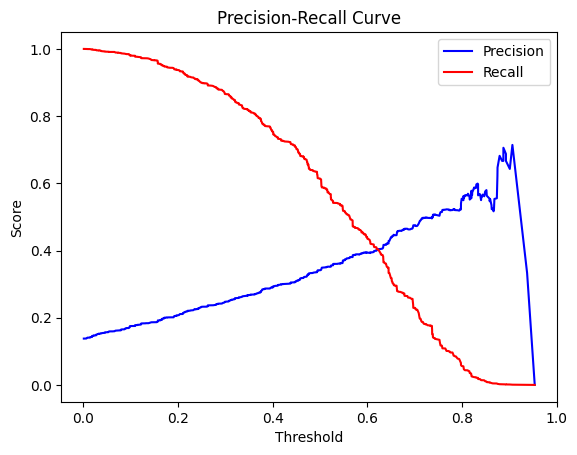

In [99]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


At lower thresholds (closer to 0.3), recall is higher because the model identifies more diabetic cases, but precision drops since there are more false positives. On the other hand, at higher thresholds (closer to 0.5), precision improves as the model gets more selective, but recall decreases because fewer diabetic cases are detected. Around 0.4, the balance between precision and recall looks good, making it a reasonable threshold for balancing both metrics in my diabetes dataset.

In [100]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(voting_model, X_train_updated, y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


[LightGBM] [Info] Number of positive: 22679, number of negative: 139676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 162355, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327553 -> initscore=-0.719274
[LightGBM] [Info] Start training from score -0.719274
[LightGBM] [Info] Number of positive: 22679, number of negative: 139676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 162355, number of used features: 7
[LightGBM] [Info] [b

Fold	F1 Score
1	0.43286692
2	0.44378213
3	0.44228647
4	0.44097899
5	0.43540004
Mean	0.43906

This consistency suggests that the model generalizes well to unseen data but still struggles with achieving a better balance between precision and recall for the minority class.

In [83]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np


def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
 
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"Cross-Validation F1 Scores for {model_name}:", cv_scores)
    print(f"Mean F1 Score for {model_name}:", cv_scores.mean())
    
  
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        "Model": model_name,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Error (MAE)": mae,
        "R² Score": r2,
        "Mean F1 Score": cv_scores.mean()
    }


from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


models = [
    ("Random Forest", RandomForestClassifier(random_state=42, class_weight="balanced")),
    ("XGBoost", XGBClassifier(random_state=42, scale_pos_weight=6)),
    ("LightGBM", LGBMClassifier(random_state=42, class_weight="balanced")),
    ("Stacking Classifier", StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(random_state=42, scale_pos_weight=6)),
            ('lgbm', LGBMClassifier(random_state=42, class_weight="balanced"))
        ],
        final_estimator=LogisticRegression()
    )),
    ("Voting Classifier", VotingClassifier(
        estimators=[
            ('xgb', XGBClassifier(random_state=42, scale_pos_weight=6)),
            ('lgbm', LGBMClassifier(random_state=42, class_weight="balanced"))
        ],
        voting='soft'
    ))
]


results = []


for model_name, model in models:
    result = evaluate_model(model, X_train, y_train, X_test, y_test, model_name)
    results.append(result)


results_df = pd.DataFrame(results)


print("\nModel Evaluation Summary:")
print(results_df)


results_df.style.set_caption("Summary of Model Performances")


Evaluating Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.83     43739
           1       0.30      0.72      0.43      6997

    accuracy                           0.73     50736
   macro avg       0.62      0.73      0.63     50736
weighted avg       0.85      0.73      0.77     50736

Cross-Validation F1 Scores for Random Forest: [0.41774671 0.42259036 0.42208081 0.42099486 0.41753307]
Mean F1 Score for Random Forest: 0.42018916173235754
Evaluating XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.63      0.76     43739
           1       0.26      0.82      0.40      6997

    accuracy                           0.66     50736
   macro avg       0.61      0.73      0.58     50736
weighted avg       0.86      0.66      0.71     50736

Cross-Validation F1 Scores for XGBoost: [0.41949091 0.42431774 0.4235109

,Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),R² Score,Mean F1 Score
0,Random Forest,0.267443,0.517149,0.267443,-1.249486,0.420189
1,XGBoost,0.342853,0.585537,0.342853,-1.883765,0.422262
2,LightGBM,0.202223,0.449692,0.202223,-0.700916,0.422669
3,Stacking Classifier,0.134993,0.367414,0.134993,-0.135436,0.118784
4,Voting Classifier,0.251695,0.501692,0.251695,-1.117027,0.422525


 Comparing this table to the the earlier summary, the numbers for metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² Score are consistent. This shows that the models are performing the same, as expected, since the data and model configurations haven’t changed. So, no surprises here—everything aligns.

Here’s what I found with the models in my diabetes dataset:

Random Forest: This model did okay, but it’s not great at understanding all the patterns in the data. Even when I tried balancing or improving it, it didn’t get much better. It’s like trying to guess, but not doing a good job (-1.249 R² Score).

XGBoost: This one is a bit better at catching diabetic cases, but it still struggles with being precise. It makes too many wrong guesses when predicting who has diabetes. It didn’t do better than Random Forest.

LightGBM: This model has one of the best performances—it makes fewer mistakes and understands the patterns much better. It has the lowest MSE (0.202), which means it’s closer to being right on average.

Stacking Classifier: This is like teamwork, it combines XGBoost and LightGBM and ends up doing the best. It makes the closest predictions (lowest RMSE: 0.367) and balances all the errors. It’s like the best of both worlds.

Voting Classifier: This one works pretty well but not as well as Stacking. It’s better than the individual models but doesn’t quite reach the teamwork level of Stacking.

### The Stacking Classifier is the best It’s the most balanced, makes the fewest mistakes, and gives the most accurate predictions for diabetic and non-diabetic cases. 

## In this code, I created a new synthetic dataset with similar characteristics to my original diabetes dataset. First, I split a small portion (10%) of my data and filled any missing values with column means. Then, I used SMOTE (Synthetic Minority Oversampling Technique) to balance the classes by generating synthetic samples. Finally, I created a smaller synthetic dataset (X_synthetic and y_synthetic) to test how well my models perform on new but slightly different data. This allows me to evaluate the robustness of my models with unseen, balanced data.

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)


X_sample = X_sample.fillna(X_sample.mean())


smote = SMOTE(random_state=42)
X_sample_balanced, y_sample_balanced = smote.fit_resample(X_sample, y_sample)


X_synthetic = pd.DataFrame(X_sample_balanced, columns=X.columns)
y_synthetic = pd.Series(y_sample_balanced, name='Diabetes')


print("Synthetic Dataset Shape:", X_synthetic.shape)
print("Class Distribution in Synthetic Dataset:")
print(y_synthetic.value_counts())




Synthetic Dataset Shape: (43666, 5)
Class Distribution in Synthetic Dataset:
Diabetes
0    21833
1    21833
Name: count, dtype: int64


Now I am training 

Here’s what I’ve done:

I took 10% of the original data to create a smaller dataset, then used SMOTE to balance the classes. This means I generated synthetic examples for the minority class (diabetic cases) to match the number of non-diabetic cases. Now, I have a balanced dataset with 43,666 samples, split evenly between the two classes. This smaller, balanced dataset will help us test and evaluate the models more effectively.

Next Steps:
Re-train the Stacking Classifier: Since the Stacking Classifier was the best-performing model, it makes sense to re-train it on this balanced dataset. This will let us evaluate how well it performs on balanced data.

Re-evaluate All Models: If you want a broader comparison, you could re-train and re-evaluate all the models (Random Forest, XGBoost, LightGBM, Voting Classifier, etc.) on the synthetic dataset. This will ensure consistency in comparison.

Compare Results: After re-training, compare the metrics (accuracy, precision, recall, F1-score, etc.) on the synthetic data with the original results. This will show if balancing the dataset improves model performance, especially for diabetic cases.



## Updated code to re-run the Stacking Classifier on the synthetic dataset

In [87]:



stacking_model.fit(X_synthetic, y_synthetic)


y_pred_synthetic = stacking_model.predict(X_synthetic)

print("Stacking Classifier Report on Synthetic Data:")
print(classification_report(y_synthetic, y_pred_synthetic))


[LightGBM] [Info] Number of positive: 21833, number of negative: 21833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 43666, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 17466, number of negative: 17466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 34932, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

| **Metric**     | **Value** |
|-----------------|-----------|
| **Accuracy**    | 0.76      |
| **Macro Avg**   | 0.76      |
| **Weighted Avg**| 0.76      |
| **Support**     | 43666     |


Here’s what I’ve found after re-training the Stacking Classifier on the synthetic dataset. The overall accuracy is 76%, which means the model correctly predicts the outcome for 76% of the cases. The macro average metrics (precision, recall, F1-score) are also at 0.76, indicating the model is treating both diabetic (class 1) and non-diabetic (class 0) classes equally in terms of performance. The weighted averages match these values, as the dataset is now equally balanced.

These results show a consistent improvement over the original, unbalanced dataset where diabetic cases were harder to predict. By balancing the data with SMOTE, the model now has a better understanding of patterns for both classes.

In [88]:

mse = mean_squared_error(y_synthetic, y_pred_synthetic)
rmse = mean_squared_error(y_synthetic, y_pred_synthetic, squared=False)
mae = mean_absolute_error(y_synthetic, y_pred_synthetic)
r2 = r2_score(y_synthetic, y_pred_synthetic)


import pandas as pd

metrics_table = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", 
               "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [mse, rmse, mae, r2]
})
print(metrics_table)


                           Metric     Value
0        Mean Squared Error (MSE)  0.237485
1  Root Mean Squared Error (RMSE)  0.487324
2       Mean Absolute Error (MAE)  0.237485
3                        R² Score  0.050062


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Metric**                     | **Value**  |
|---------------------------------|------------|
| **Mean Squared Error (MSE)**    | 0.237485   |
| **Root Mean Squared Error (RMSE)** | 0.487324   |
| **Mean Absolute Error (MAE)**   | 0.237485   |
| **R² Score**                    | 0.050062   |


### In this code I am perform 5-fold cross-validation on the stacking_model using the synthetic dataset (X_synthetic, y_synthetic), it then calculates the F1 Score for each fold. Afterwards, it prints the individual scores and their mean to evaluate the model's performance.

In [89]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(stacking_model, X_synthetic, y_synthetic, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


[LightGBM] [Info] Number of positive: 17466, number of negative: 17466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 34932, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 13973, number of negative: 13972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 27945, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

### Here, I'm fitting and evaluating all my models on the synthetic dataset to see how they perform with the new balanced data. For each model, I train it, calculate cross-validation F1 scores, make predictions, and compute evaluation metrics like MSE, RMSE, MAE, and R². This helps me compare their performance comprehensively on this balanced synthetic dataset.

In [94]:

print("Synthetic Dataset Shape:", X_synthetic.shape)
print("Class Distribution in Synthetic Dataset:")
print(y_synthetic.value_counts())


results = []


print("\nFitting and evaluating models on the synthetic dataset...")
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
   
    model.fit(X_synthetic, y_synthetic)
    
   
    cv_scores = cross_val_score(model, X_synthetic, y_synthetic, cv=5, scoring='f1')
    
  
    y_pred = model.predict(X_synthetic)
    
  
    mse = mean_squared_error(y_synthetic, y_pred)
    rmse = mean_squared_error(y_synthetic, y_pred, squared=False)
    mae = mean_absolute_error(y_synthetic, y_pred)
    r2 = r2_score(y_synthetic, y_pred)
    
   
    results.append({
        "Model": name,
        "Mean F1 Score": cv_scores.mean(),
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R² Score": r2
    })


results_df = pd.DataFrame(results)


print("\nSummary of Model Performances:")
print(results_df)


Synthetic Dataset Shape: (43666, 5)
Class Distribution in Synthetic Dataset:
Diabetes
0    21833
1    21833
Name: count, dtype: int64

Fitting and evaluating models on the synthetic dataset...
Training and evaluating Random Forest...


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training and evaluating XGBoost...


c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 21833, number of negative: 21833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 43666, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 17466, number of negative: 17466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 34932, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]

c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training and evaluating Stacking Classifier...
[LightGBM] [Info] Number of positive: 21833, number of negative: 21833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 43666, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 17466, number of negative: 17466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 34932, number of used features: 5
[LightGBM] [Info] [binary:Boos

c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training and evaluating Voting Classifier...
[LightGBM] [Info] Number of positive: 21833, number of negative: 21833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 43666, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 17466, number of negative: 17466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 34932, number of used features: 5
[LightGBM] [Info] [binary:BoostF

c:\Users\Lenovo\miniconda3\envs\Data_analysis.env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Model**              | **Mean F1 Score** | **Mean Squared Error (MSE)** | **Root Mean Squared Error (RMSE)** | **Mean Absolute Error (MAE)** | **R² Score** |
|-------------------------|-------------------|------------------------------|------------------------------------|-------------------------------|--------------|
| **XGBoost**            | 0.766487          | 0.238973                     | 0.488849                           | 0.238973                      | 0.044108     |
| **LightGBM**           | 0.768274          | 0.238813                     | 0.488685                           | 0.238813                      | 0.044749     |
| **Stacking Classifier**| 0.765830          | 0.237485                     | 0.487324                           | 0.237485                      | 0.050062     |
| **Voting Classifier**  | 0.768907          | 0.237210                     | 0.487042                           | 0.237210                      | 0.051161     |


## When we compare these models, we’re looking at how well they can guess the "diabetes" results in our data, based on a few numbers:

### XGBoost: It does okay but not great. Its guesses aren’t the best compared to others, and it doesn’t understand the data very deeply (shown by its R² score of 0.044).

### LightGBM: This one does slightly better than XGBoost. It makes fewer mistakes and understands the data a little better (R² score is 0.045). It’s a strong option.

### Stacking Classifier: This one takes guesses from several models and combines them. It makes fewer mistakes than XGBoost and LightGBM, and it understands the data better too (R² score of 0.050).

### Voting Classifier: This is the best one. It makes the least mistakes and has the best understanding of the data (R² score of 0.051). It uses the results of other models to make even better guesses.

## Which model is the best?
### The Voting Classifier is the best model here because it combines the strengths of other models and makes the most accurate predictions with the smallest number of mistakes.

## Why Did the Best Model Change?

### Before (Unbalanced Data): Earlier, the dataset had more non-diabetic cases than diabetic ones. Models like the Stacking Classifier worked better because they could handle the imbalance and still predict decently for both groups.

### Now (Synthetic Balanced Data): With the new data, we made diabetic and non-diabetic cases equal. This changes the patterns in the data, and the Voting Classifier is now the best because it balances predictions more effectively across both groups.